In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

  <h1>
      <p style="font-size:18pt">COMP0198: Machine Learning with Applications in Finance - Assignment - Part 1</p>
  </h1>

From assignment brief:

There are 25 variables and 30,000 rows of data.  
The variables have the following meaning:  
• X0: ID of the customer   
• X1: Amount of the given credit (NT dollar): it includes individual consumer credit and family (supplementary) credit.  
• X2: Gender (1 = male; 2 = female).  
• X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).  
• X4: Marital status (1 = married; 2 = single; 3 = others).  
• X5: Age (in years).  
• X6 - X11: History of past payments. The past monthly payment records (from April to September 2005) are as follows: X6 = the repayment status in September 2005; X7 = the repayment status in August 2005; . . .; X11 = the repayment status in April 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.  
• X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September 2005; X13 = amount of bill statement in August 2005; . . .; X17 = amount of bill statement in April 2005.  
• X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .; X23 = amount paid in April, 2005.  
• X24: The default on payment in the next month (Yes =1; No = 1)  

# Data exploration

In [2]:
# Import required libraries
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [3]:
# Loading the data
df = pd.read_csv('default_of_credit_card_clients.csv')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
# Eliminating the top row of the dataframe which simply numbers the features as it is dispensable
df = pd.read_csv('default_of_credit_card_clients.csv', skiprows=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Naming the target variable more intuitively to allow for easier coding
df.rename(columns={'default payment next month':'default_result'}, inplace=True)
# Renaming PAY_0 to PAY_1 to match rest of column labels relating to 'PAY'
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
# checking data type and whether there is any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              30000 non-null  int64
 1   LIMIT_BAL       30000 non-null  int64
 2   SEX             30000 non-null  int64
 3   EDUCATION       30000 non-null  int64
 4   MARRIAGE        30000 non-null  int64
 5   AGE             30000 non-null  int64
 6   PAY_1           30000 non-null  int64
 7   PAY_2           30000 non-null  int64
 8   PAY_3           30000 non-null  int64
 9   PAY_4           30000 non-null  int64
 10  PAY_5           30000 non-null  int64
 11  PAY_6           30000 non-null  int64
 12  BILL_AMT1       30000 non-null  int64
 13  BILL_AMT2       30000 non-null  int64
 14  BILL_AMT3       30000 non-null  int64
 15  BILL_AMT4       30000 non-null  int64
 16  BILL_AMT5       30000 non-null  int64
 17  BILL_AMT6       30000 non-null  int64
 18  PAY_AMT1        30000 non-

In [7]:
# separating the explanatory variables from the index and the target variable, this gives 23 explanatory variables as there are 25 variables in total
explanatory_variables = df.columns[0:23] 
explanatory_variables_list = list(explanatory_variables)
type(explanatory_variables_list)
print(explanatory_variables_list)
print(len(explanatory_variables_list))
#print(len(explanatory_variables.tolist))
df[explanatory_variables_list].describe().T

list

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']
23


,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [8]:
# checking how many values there are in each category for variable 'PAY_1'
df['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [9]:
# checking how many values there are in each category for variable 'PAY_2'
df['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [10]:
# checking how many values there are in each category for variable 'MARRIAGE'
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [11]:
# checking how many values there are in each category for variable 'EDUCATION'
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Inspecting the results above can lead to various observations. At first glance, the 'MARRIAGE' variable in the dataset seems to not only have categories 1, 2, 3 and but also 0. The 'EDUCATION' variable has not only categories 1-4 but also 0 and 6. Furthermore, the 'PAY_X' variables seem to also include categories -2 however only goes until category 8 as opposed to 9 as specified by the information provided about the dataset. Deductions must be made on these observations that seem to be anomalies therefore further inspection must be undertaken. Furthermore, there is a different amount of values for each 'PAY_X' variable, which is something to be checked. 'SEX' has 2 different values, which aligns with the description of the dataset, therefore no issue lies there. 'AGE' does not have to be inspected as it is a continuous variable and the number 56 simply indicates that there are 56 different ages that were recorded. 'LIMIT_BAL', 'BILL_AMTX' and 'PAY_AMTX' does not need investigation due to the fact that there are numerical values. The value of 2 for default result indicated that the classification is binary (0 - not defaulted, 1 - defaulted). However looking at the table formed using the describe() method, some values seem to be negative of which the indication should be deduced at a later stage.

Firstly, the unique elements must be investigated. It is also important to notice that 'BILL_AMTX' has negative values of which the meaning must be understood.

In [12]:
# check the number of unique and distinct elements for each category within the dataframe
df.nunique()

ID                30000
LIMIT_BAL            81
SEX                   2
EDUCATION             7
MARRIAGE              4
AGE                  56
PAY_1                11
PAY_2                11
PAY_3                11
PAY_4                11
PAY_5                10
PAY_6                10
BILL_AMT1         22723
BILL_AMT2         22346
BILL_AMT3         22026
BILL_AMT4         21548
BILL_AMT5         21010
BILL_AMT6         20604
PAY_AMT1           7943
PAY_AMT2           7899
PAY_AMT3           7518
PAY_AMT4           6937
PAY_AMT5           6897
PAY_AMT6           6939
default_result        2
dtype: int64

In [13]:
# checking how many unique categories exist within each variable
# checking 'EDUCATION' variable
education_unique = df['EDUCATION'].unique()
print("Unique 'EDUCATION' categories:", sorted(education_unique))
# checking 'MARRIAGE' variable
marriage_unique = df['MARRIAGE'].unique()
print("Unique 'MARRIAGE' categories:", sorted(marriage_unique))
# checking 'PAY_X' variables
pay_1_unique = df['PAY_1'].unique()
print("Unique 'PAY_1' categories:", sorted(pay_1_unique))
pay_2_unique = df['PAY_2'].unique()
print("Unique 'PAY_2' categories:", sorted(pay_2_unique))
pay_3_unique = df['PAY_3'].unique()
print("Unique 'PAY_3' categories:", sorted(pay_3_unique))
pay_4_unique = df['PAY_4'].unique()
print("Unique 'PAY_4' categories:", sorted(pay_4_unique))
pay_5_unique = df['PAY_5'].unique()
print("Unique 'PAY_5' categories:", sorted(pay_5_unique))
pay_6_unique = df['PAY_6'].unique()
print("Unique 'PAY_6' categories:", sorted(pay_6_unique))

Unique 'EDUCATION' categories: [0, 1, 2, 3, 4, 5, 6]
Unique 'MARRIAGE' categories: [0, 1, 2, 3]
Unique 'PAY_1' categories: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Unique 'PAY_2' categories: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Unique 'PAY_3' categories: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Unique 'PAY_4' categories: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Unique 'PAY_5' categories: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
Unique 'PAY_6' categories: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


As previously observed, the 'EDUCATION', 'MARRIAGE' and 'PAY_X' variables do in fact have a differing amount of categories per variable, compared to the information provided by the dataset. In the information provided by the dataset, the 'EDUCATION' variable has 4 categories (1-4), whilst above, it also has categories 0, 5 and 6. Apart from the original categories in the 'MARRIAGE' variable, the variable also has a 0 variable. The 'PAY_X' variables also show to have a differing number of variables, 'PAY_1' - 'PAY_4' have variables -2 till 8, which differs to the data description which stated that 0-9 categories existed. 'PAY_5' has variables -2 till 8 but excludes 1. Onwards from this point, it is necessary to plot the data distribution to be able to understand how to do preprocess and handle the data prior to building the models.

In [14]:
df.index = df['ID'] # making the index the same as the 'ID' column
df.drop('ID',axis=1,inplace=True) # getting rid of original 'ID' column
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [15]:
# checking whether there are any missing values
df.isnull().sum() 

LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
PAY_1             0
PAY_2             0
PAY_3             0
PAY_4             0
PAY_5             0
PAY_6             0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
default_result    0
dtype: int64

There are no missing variables within the dataset.

# Distributions of Data

This next section aims to explore the distribution of the data and how various variables are divided, moreover to check whether there is any severe imbalance and whether any of the classes are sparse, this is important so that overfitting and underfitting of the data can be avoided.

<AxesSubplot: >

Text(0.5, 0, 'default_result')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Number of Not Defaulted (0) vs Defaulted (1)')

,count
default_result,
0,23364
1,6636


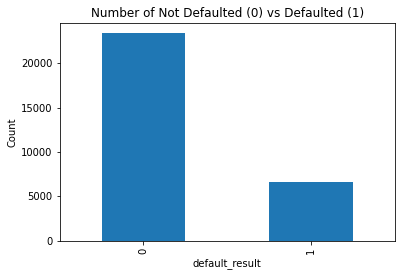

In [16]:
# plotting the amount of defaulted payments and not defaulted payments
df['default_result'].value_counts().plot(kind = 'bar')
plt.xlabel('default_result')
plt.ylabel('Count')
plt.title('Number of Not Defaulted (0) vs Defaulted (1)')
imbalance = df['default_result'].value_counts().rename_axis('default_result').to_frame('count')
imbalance

<AxesSubplot: ylabel='default_result'>

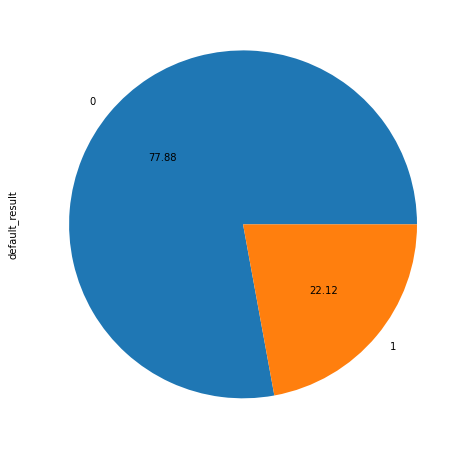

In [17]:
# checking imbalance of dataset, target variable (default)
df['default_result'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')
# imbalanced dataset, 77.88% do not default, 22.12% do default

By normalizing the plotted count against the number of not defaulted and defaulted payments, it is clearly visible that approximately 78% of total credit card customers are expected to not default whilst 22% are expected to deal with. This creates an unbalanced dataset which may have many implications. To overcome this, down/oversampling will be used at a later stage.

default_result,,0,1,Percentage that don't default (0),Percentage that default (1)
SEX,,,,,
1,11888,9015,2873,0.758328,0.241672
2,18112,14349,3763,0.792237,0.207763


default_result,,0,1,Percentage that don't default (0),Percentage that default (1)
EDUCATION,,,,,
0,14,14.0,NaN,NaN,NaN
1,10585,8549.0,2036.0,0.807652,0.192348
2,14030,10700.0,3330.0,0.762651,0.237349
3,4917,3680.0,1237.0,0.748424,0.251576
4,123,116.0,7.0,0.943089,0.056911
5,280,262.0,18.0,0.935714,0.064286
6,51,43.0,8.0,0.843137,0.156863


default_result,,0,1,Percentage that don't default (0),Percentage that default (1)
MARRIAGE,,,,,
0,54,49,5,0.907407,0.092593
1,13659,10453,3206,0.765283,0.234717
2,15964,12623,3341,0.790717,0.209283
3,323,239,84,0.739938,0.260062



'SEX' variable key:
1 - male
2 - female

'EDUCATION' variable key:
1 - graduate school 
2 - university
3 - high school
4 - others

'MARRIAGE' variable key:
1 - married
2 - single
3 - others



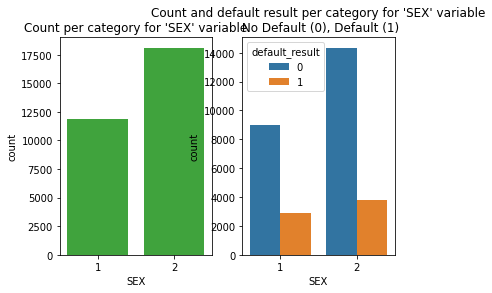

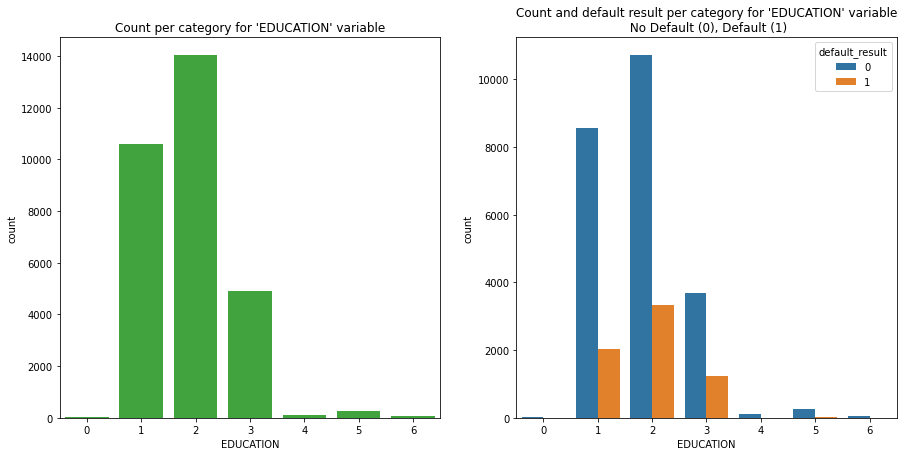

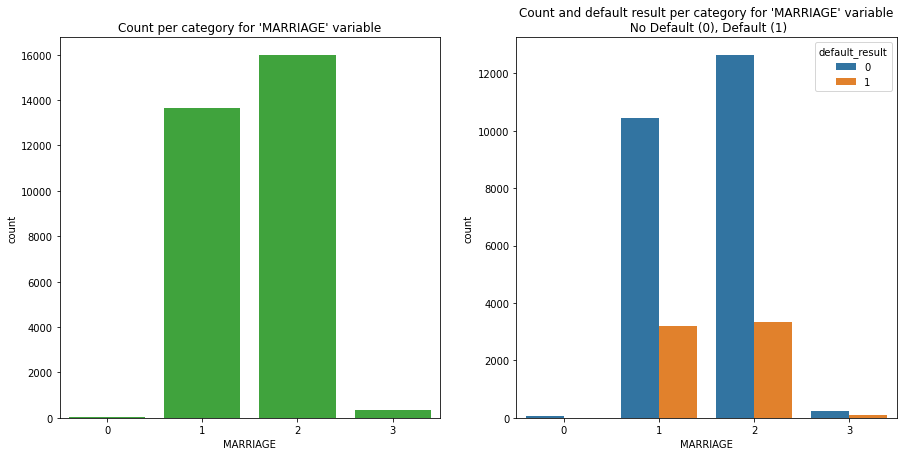

In [18]:
# defining function for barplots to plot the count per variable and count per variable with the default result
def barplot(variable, default):
    fig, ax =plt.subplots(1,2)
    plt.rcParams["figure.figsize"] = [15,7] # setting figure size
    shade = matplotlib.colors.hex2color('#30B42C') # setting colour of bars 
    title1 = "Count per category for \'" + variable + "\' variable"
    title2 = "Count and default result per category for \'" + variable + "\' variable" + "\n No Default (0), Default (1)"
    sns.countplot(x=variable, data=df, color=shade, ax=ax[0]).set(title=title1) # plotting left barplot
    sns.countplot(x=variable, data=df ,hue=default, ax=ax[1]).set(title=title2) # plotting right barplot

# defining function that creates a dataframe summarizing values
def default_perc_calc(variable, default):
    perc = df.groupby([variable, default]).size().unstack() # deparating non-defaults (0) from defaults (1) for select variable
    perc['Percentage that don\'t default (0)'] = (perc[perc.columns[0]]/(perc[perc.columns[0]] + perc[perc.columns[1]])) # calculating percentage of no defaults
    perc['Percentage that default (1)'] = (perc[perc.columns[1]]/(perc[perc.columns[0]] + perc[perc.columns[1]])) # calculating percentage of defaults
    data_plot = df[variable].value_counts() # creating a series of how many values there are per category
    total = data_plot.to_frame().sort_index() # converting the series to a dataframe, sorting index so it aligns correctly with rest of dataframe, otherwise returns values from high to low
    perc.insert(0, '', total) # adding a column to the dataframe with total amount of values for given variable
    return perc

# calling barplot function to plot barplots for each categorical variable
barplot('SEX', 'default_result')
barplot('EDUCATION', 'default_result')
barplot('MARRIAGE', 'default_result')

# calling default_perc_calc to diplay dataframes
default_perc_calc('SEX', 'default_result')
default_perc_calc('EDUCATION', 'default_result')
default_perc_calc('MARRIAGE', 'default_result')

print("""
'SEX' variable key:
1 - male
2 - female

'EDUCATION' variable key:
1 - graduate school 
2 - university
3 - high school
4 - others

'MARRIAGE' variable key:
1 - married
2 - single
3 - others
""")

From the generated plots, a couple of observations can be made:   

'SEX'variable:  
The first plot shows that there are more women than men. It can also be deduced that men are more likely to default showing a chance of 24% of default, whilst women have a 20% chance of default.  

'EDUCATION'variable:  
As previously discovered the actual dataset has a couple of additional categories for the 'EDUCATION' variable. The additional categories are 0, 4, 5 and 6. Since these categories do not have that many instances, they could all be combined into one category named 'other'. It is clear that the most data is from customers that are at university. Looking at the default divide, the customers that are most likely to default are high schoolers. The data clearly shows that they higher the level of education, the less likely the customer is likely to default. 
 
'MARRIAGE'variable:  
The additional unnamed category '0', does not have many instances, therefore it can be combined with the 'other' category. The majority of the data for the 'MARRIAGE' variable is provided by the 'single' category. From the default divide it can be deduced that the 'others' category is most likely to defualt however from the named categories, 'MARRIED' customers are more likely to default as opposed to 'SINGLE'customers, however not much attention shoudl be given to the 'other' variable as it has significantly less data points than 'MARRIED' and 'SINGLE'.


<AxesSubplot: xlabel='AGE'>

Text(0.5, 0, 'AGE')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Plotted count for each age, showing default result divide')

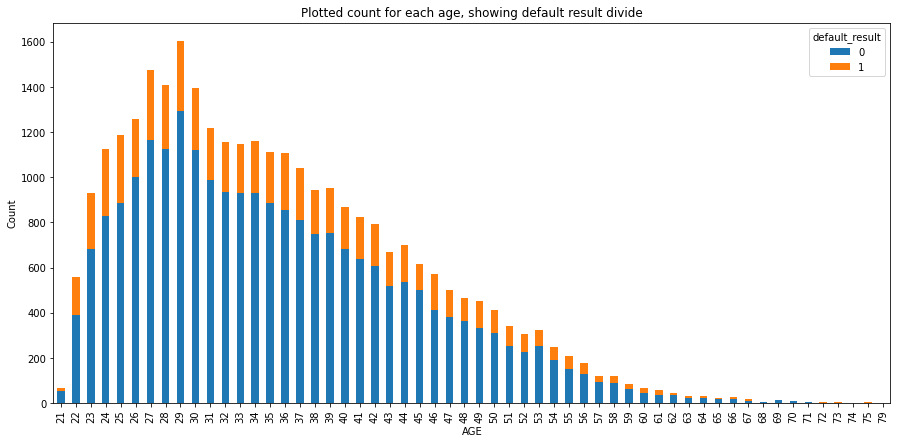

In [46]:
# plotting age to see default per age group
age_plot = df.groupby(['AGE', 'default_result']).size().unstack()
age_plot.plot(kind='bar', stacked=True)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.title('Plotted count for each age, showing default result divide')

The plotted bar plot above for the count of the default result against the 'AGE' variable shows clearly shows that younger peopel have a higher possibility of deafult than older people. The default count significantly decreases and stays low after the age of 60. The highest count for default payment is between the ages 27 and 32. The count increases at first from the ages of 21-30 and then gradually decreases as shown by the plot above. 

(<Figure size 2160x432 with 1 Axes>, <AxesSubplot: >)

/var/folders/z8/zxrt68rx06g1xmphsd1v5ymh0000gn/T/ipykernel_13695/2847053637.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


<AxesSubplot: >

/var/folders/z8/zxrt68rx06g1xmphsd1v5ymh0000gn/T/ipykernel_13695/2847053637.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LIMIT_BAL'], kde=True, bins=40)


<AxesSubplot: xlabel='LIMIT_BAL', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of Density vs Limit Balance')

<AxesSubplot: >

/var/folders/z8/zxrt68rx06g1xmphsd1v5ymh0000gn/T/ipykernel_13695/2847053637.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AGE'], kde=True, bins=40)


<AxesSubplot: xlabel='AGE', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of Density vs Age')

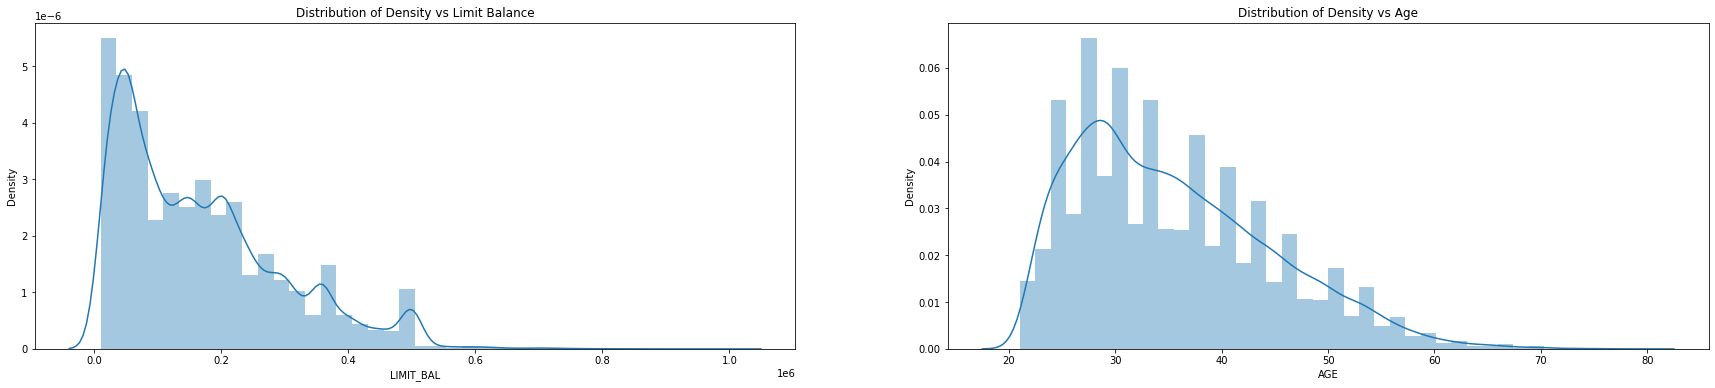

In [47]:
plt.subplots(figsize=(30,6))

# plotting the continuous variable of limit balance to show its density
plt.subplot(121)
sns.distplot(df['LIMIT_BAL'], kde=True, bins=40)
plt.title('Distribution of Density vs Limit Balance')

# plotting the continuous variable of age to show its density
plt.subplot(122)
sns.distplot(df['AGE'], kde=True, bins=40)
plt.title('Distribution of Density vs Age')

plt.show()

The distributions of the continuous variables 'LIMIT_BAL' and 'AGE' show that the data is positively skewed. The two variables also show that they have a similary distribution.

<AxesSubplot: xlabel='AGE', ylabel='LIMIT_BAL'>

Text(0.5, 1.0, "'LIMIT_BAL' vs. 'AGE'")

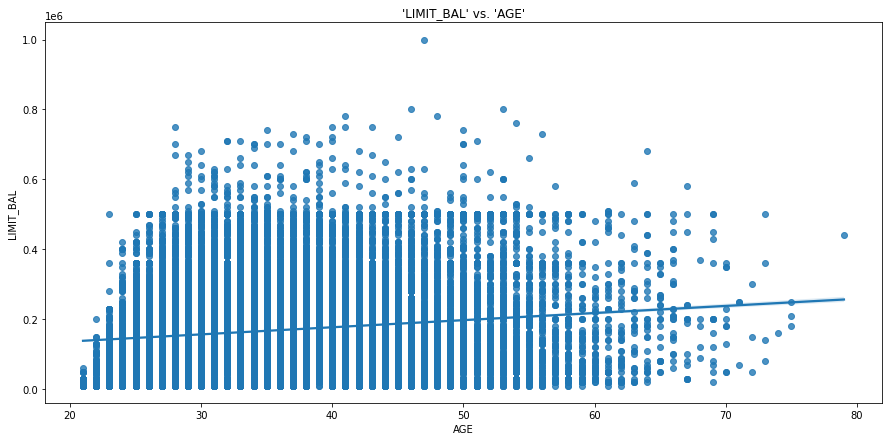

In [48]:
sns.regplot(x='AGE', y='LIMIT_BAL', data=df)
plt.title("\'LIMIT_BAL\' vs. \'AGE\'")

A plot of 'LIMIT_BAL' against 'AGE' shows that as age increases there is a slight increase in the limit balance.

<AxesSubplot: xlabel='EDUCATION', ylabel='LIMIT_BAL'>

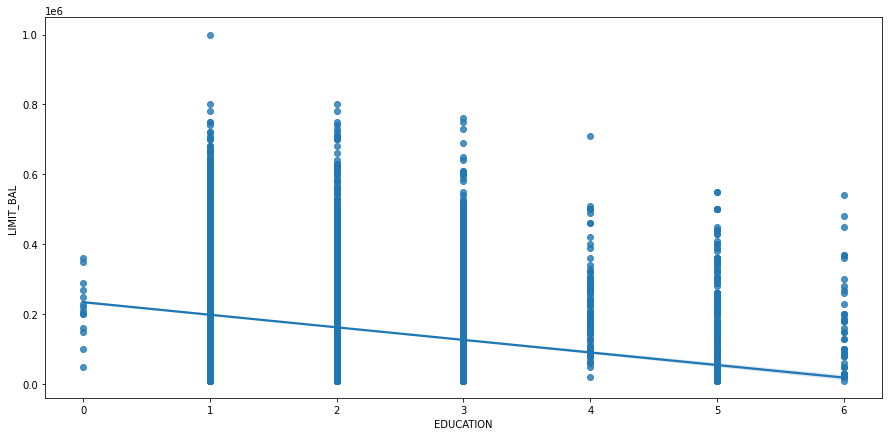

In [49]:
sns.regplot(x='EDUCATION', y='LIMIT_BAL', data=df)

<AxesSubplot: xlabel='PAY_AMT1', ylabel='BILL_AMT1'>

<AxesSubplot: xlabel='PAY_AMT2', ylabel='BILL_AMT2'>

<AxesSubplot: xlabel='PAY_AMT3', ylabel='BILL_AMT3'>

<AxesSubplot: xlabel='PAY_AMT4', ylabel='BILL_AMT4'>

<AxesSubplot: xlabel='PAY_AMT5', ylabel='BILL_AMT5'>

<AxesSubplot: xlabel='PAY_AMT6', ylabel='BILL_AMT6'>

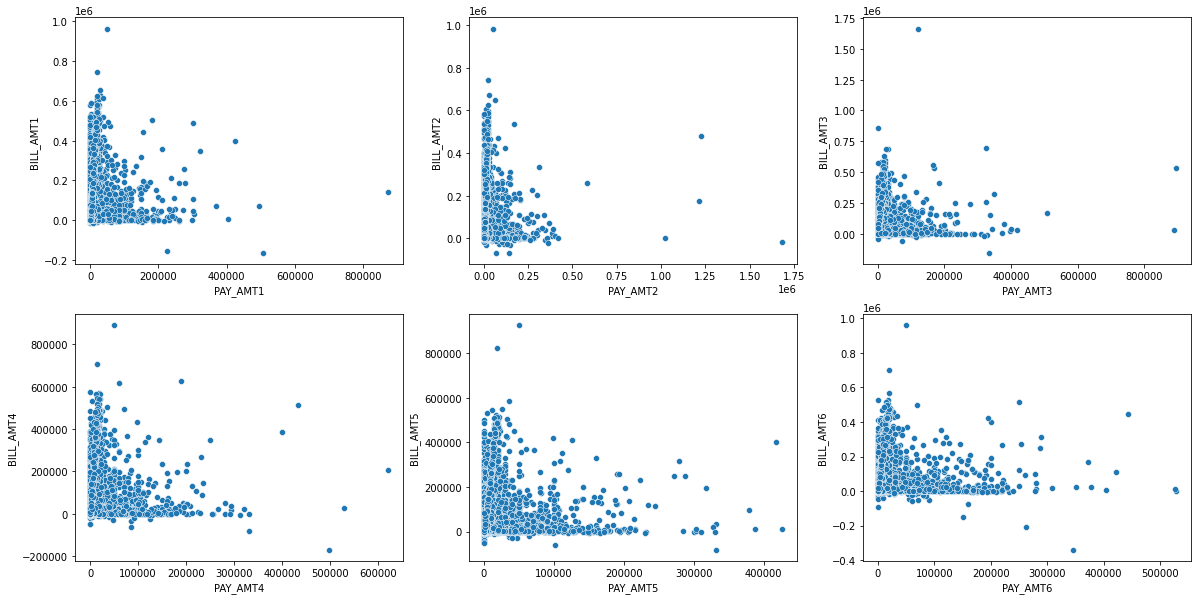

In [50]:
# plotting all bill amounts against pay amounts using scatter plots
fig, ax =plt.subplots(2,3, figsize=(20, 10))
sns.scatterplot(x=df['PAY_AMT1'], y=df['BILL_AMT1'], ax=ax[0,0])
sns.scatterplot(x=df['PAY_AMT2'], y=df['BILL_AMT2'], ax=ax[0,1])
sns.scatterplot(x=df['PAY_AMT3'], y=df['BILL_AMT3'], ax=ax[0,2])
sns.scatterplot(x=df['PAY_AMT4'], y=df['BILL_AMT4'], ax=ax[1,0])
sns.scatterplot(x=df['PAY_AMT5'], y=df['BILL_AMT5'], ax=ax[1,1])
sns.scatterplot(x=df['PAY_AMT6'], y=df['BILL_AMT6'], ax=ax[1,2])

[Text(0.5, 1.0, 'Count against limit balance showing the default result')]

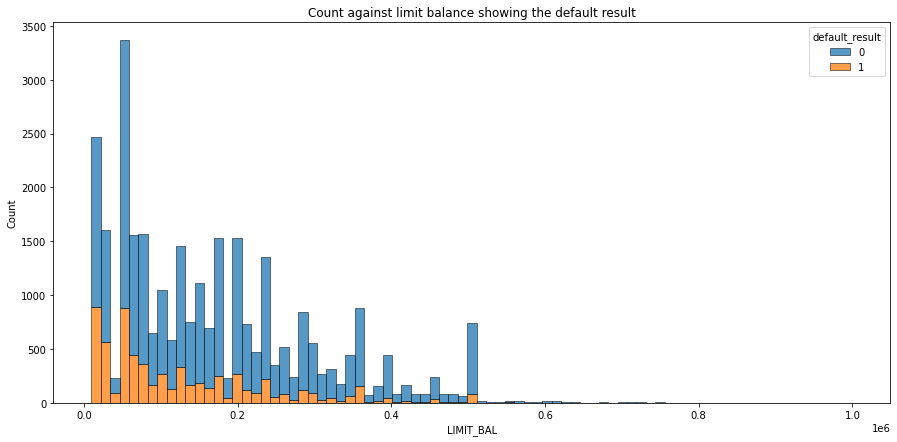

In [51]:
sns.histplot(df,x="LIMIT_BAL", hue="default_result", multiple="stack", linewidth=.5).set(title='Count against limit balance showing the default result')

<AxesSubplot: xlabel='PAY_1'>

<AxesSubplot: xlabel='PAY_2'>

<AxesSubplot: xlabel='PAY_3'>

<AxesSubplot: xlabel='PAY_4'>

<AxesSubplot: xlabel='PAY_5'>

<AxesSubplot: xlabel='PAY_6'>

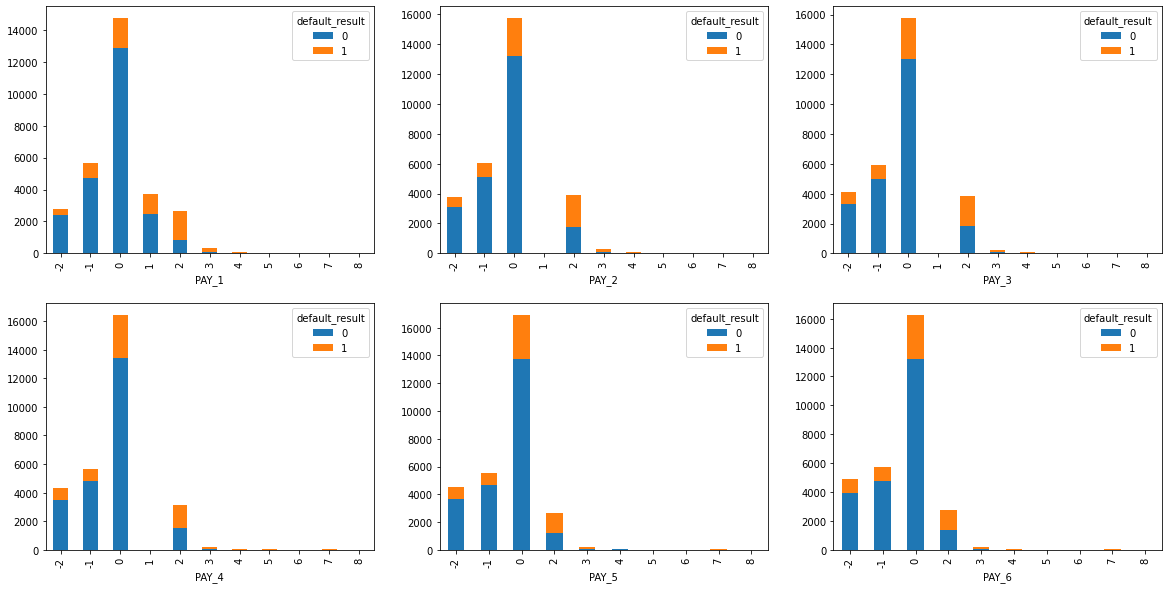

In [52]:
fig, ax =plt.subplots(2,3, figsize=(20, 10))
pay_x_plot = df.groupby(['PAY_1', 'default_result']).size().unstack()
pay_x_plot.plot(kind='bar', stacked=True, ax=ax[0,0])
pay_x_plot = df.groupby(['PAY_2', 'default_result']).size().unstack()
pay_x_plot.plot(kind='bar', stacked=True, ax=ax[0,1])
pay_x_plot = df.groupby(['PAY_3', 'default_result']).size().unstack()
pay_x_plot.plot(kind='bar', stacked=True, ax=ax[0,2])
pay_x_plot = df.groupby(['PAY_4', 'default_result']).size().unstack()
pay_x_plot.plot(kind='bar', stacked=True, ax=ax[1,0])
pay_x_plot = df.groupby(['PAY_5', 'default_result']).size().unstack()
pay_x_plot.plot(kind='bar', stacked=True, ax=ax[1,1])
pay_x_plot = df.groupby(['PAY_6', 'default_result']).size().unstack()
pay_x_plot.plot(kind='bar', stacked=True, ax=ax[1,2])

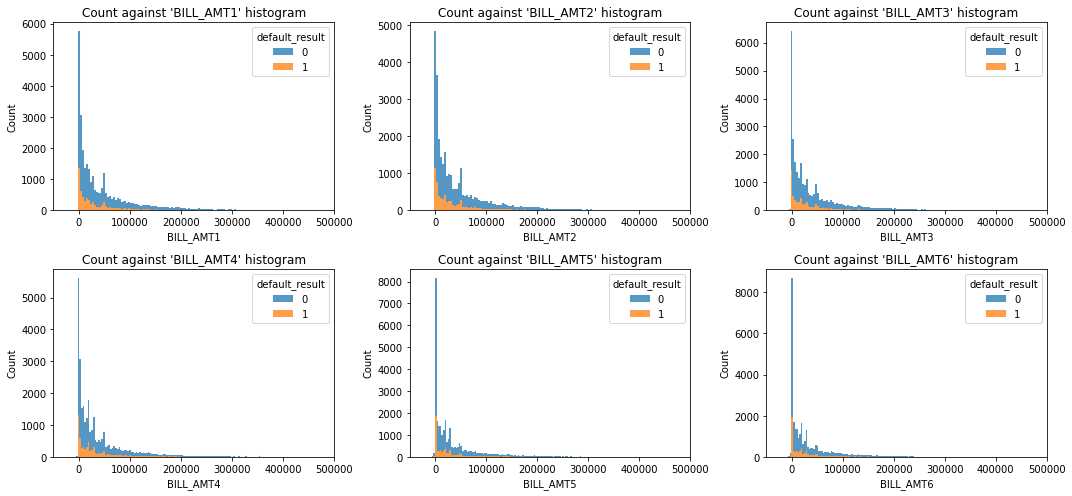

In [47]:
# histograms for BILL_AMTX against count

histogram_df = df

def histogram_plot(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        ax.set_xlim(-50000,500000)
        title_ = "Count against \'" + var_name + "\' histogram"
        sns.histplot(histogram_df,x=var_name, hue="default_result", multiple="stack", ax=ax, linewidth=.01).set(title=title_)
        fig.tight_layout() 


bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
histogram_plot(bills, bills.columns, 2, 3)

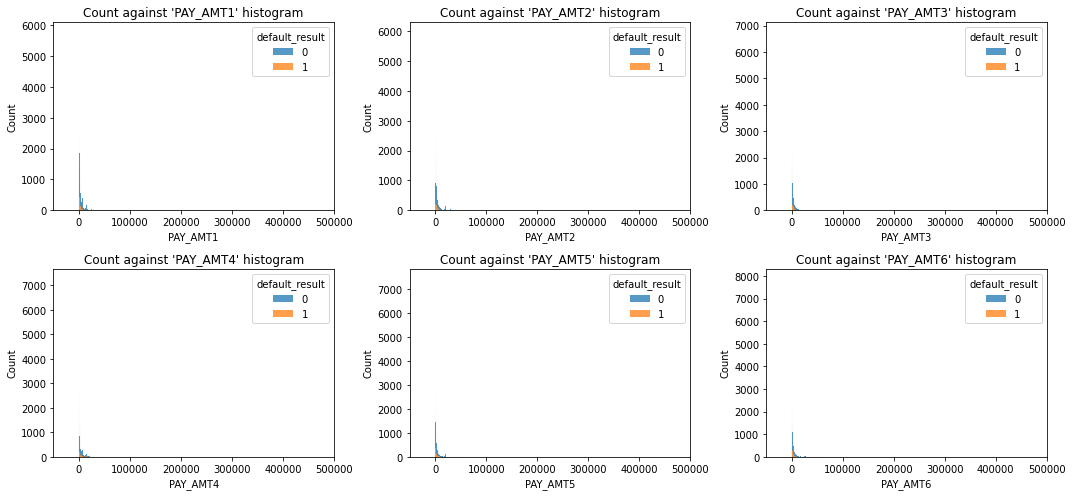

In [48]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
histogram_plot(pay, pay.columns, 2, 3)

# Correlation

(<Figure size 1440x1440 with 1 Axes>, <AxesSubplot: >)

<AxesSubplot: >

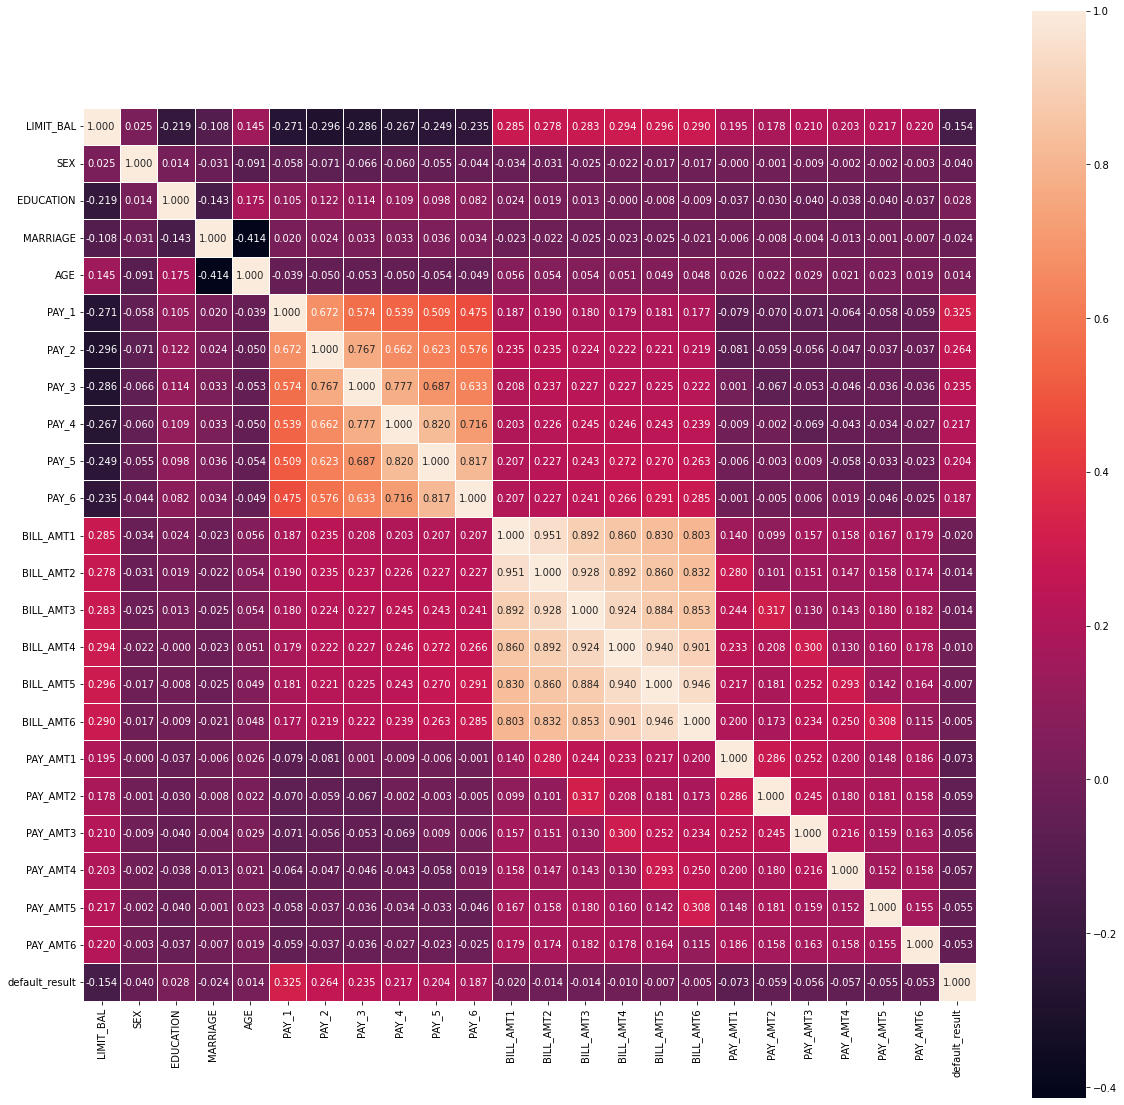

In [19]:
#correlation, shows how features are related to each other
correlation_data_full = df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation_data_full, annot=True, fmt='.3f', square=True, linewidth=.5)

The correlation matrix makes it evidently visible that whether the bill is payed on time (PAY_0, PAY_1 etc.), is not correlated highly to the categorical variables including the limit balance, sex, education or marriage or the numerical variable of age. The highest positive correlation between payments is other payments within the payments history. It is also evident that the default result is positively ocrrelated to whether the bill is payed on time. Therefore, it can be deduced that whether or not there is a default, is rather determined by whether the previous payment was done on time moreso than the characteristics of the individual. 

Categorical values show to be the categories: SEX, EDUCATION, MARRIAGE, AGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6. Therefore these categories need to be inspected. 


<AxesSubplot: title={'center': 'Correlation plot'}>

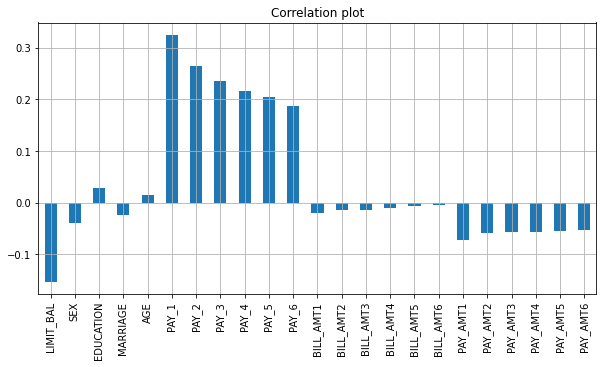

In [20]:
correlation_plot_df = df.drop(['default_result'],axis=1)
correlation_plot_df.corrwith(df['default_result']).plot.bar(figsize = (10, 5), title = "Correlation plot", grid = True)

# Feature Engineering

As observed earlier, the categories 'EDUCATION' and 'MARRIAGE' have more categories than provided in the description, therefore, some of these categories can be merged.  
The 'EDUCATION' variable has additional categories of 0, 5 and 6. This can be dealt with by merging these categories with category 4 due to the fact that there aren't many instances in these three unnamed categories therefore they won't affect the dataset that much.   
The 'MARRIAGE' variable has an extra category for 0. This unnamed category can be merged with category 3 and treated as 'others', once again, this extra category does not have many instances therefore, this will not impact the results and models negatively.    
The 'PAY_X' variables have additional categories -2 and 0 however PAY_5 also has a missing variable 9 which was initially defined in the dataset description. This can be dealt with by merging the 0 category with the -1 and assuming that the 0 category means that the payments have been payed duly. 


In [21]:
df_fixed = df

# making the category 0, 5 and 6 part of category 4 for 'EDUCATION' variable
df_fixed['EDUCATION'] = df_fixed['EDUCATION'].apply(lambda x:4 if x==0 or x==5 or x==6 else x)
# making the category 0 part of category 3 for 'MARRIAGE' variable
df_fixed['MARRIAGE'] = df_fixed['MARRIAGE'].apply(lambda x:3 if x==0 else x)


# checking NEW unique categories of'EDUCATION' variable
education_unique = df_fixed['EDUCATION'].unique()
print("New unique 'EDUCATION' categories:", sorted(education_unique))
# checking NEW unique categories of 'MARRIAGE' variable
marriage_unique = df_fixed['MARRIAGE'].unique()
print("New unique 'MARRIAGE' categories:", sorted(marriage_unique))


New unique 'EDUCATION' categories: [1, 2, 3, 4]
New unique 'MARRIAGE' categories: [1, 2, 3]


Creation of dummy variables - one-hot encoding.

In [22]:
df_ = df_fixed
df_

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [23]:
# performing one hot encoding of dummy variables for 'MARRIAGE', can do this due to the fact that this variable is categorical and not ranked
MARRIAGE_dummies = pd.get_dummies(df_['MARRIAGE'], columns='MARRIAGE', prefix='MARRIAGE')
MARRIAGE_dummies

,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
5,1,0,0
...,...,...,...
29996,1,0,0
29997,0,1,0
29998,0,1,0


In [24]:
# REFERENCE github code?
# adding 'MARRIAGE' dummy variables to dataset by replacing original 'MARRIAGE' variable
df_add_m_dummies = pd.concat([df_.iloc[:,0:3],MARRIAGE_dummies],axis = 1)
df_dummies = pd.concat([df_add_m_dummies,df_.iloc[:,4:24]],axis = 1)
df_new_m = df_dummies
df_new_m

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,0,0,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,0,1,0,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,0,1,0,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,0,0,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,0,0,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,0,0,39,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,0,1,0,43,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,0,1,0,37,4,3,2,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [25]:
SEX_dummies = pd.get_dummies(df_['SEX'], columns='SEX', prefix='SEX')
SEX_dummies

,SEX_1,SEX_2
ID,,
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
...,...,...
29996,1,0
29997,1,0
29998,1,0


In [26]:
# adding 'SEX' dummy variables to dataset by replacing origincal 'SEX' variable
df_add_s_dummies = pd.concat([df_new_m.iloc[:,0:1],SEX_dummies],axis = 1)
df_dummies = pd.concat([df_add_s_dummies,df_new_m.iloc[:,2:26]],axis = 1)
df_new_s = df_dummies
df_new_s

,LIMIT_BAL,SEX_1,SEX_2,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE,PAY_1,PAY_2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,0,1,2,1,0,0,24,2,2,...,0,0,0,0,689,0,0,0,0,1
2,120000,0,1,2,0,1,0,26,-1,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,0,1,2,0,1,0,34,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,0,1,2,1,0,0,37,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,0,2,1,0,0,57,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,0,3,1,0,0,39,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,0,3,0,1,0,43,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,0,2,0,1,0,37,4,3,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [27]:
# renaming final dataset for simplicity
df_new = df_new_s
df_new 

,LIMIT_BAL,SEX_1,SEX_2,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE,PAY_1,PAY_2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,0,1,2,1,0,0,24,2,2,...,0,0,0,0,689,0,0,0,0,1
2,120000,0,1,2,0,1,0,26,-1,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,0,1,2,0,1,0,34,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,0,1,2,1,0,0,37,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,0,2,1,0,0,57,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,0,3,1,0,0,39,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,0,3,0,1,0,43,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,0,2,0,1,0,37,4,3,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


The 'EDUCATION' variable does not require dummy variables to be generated due to the fact that it is a variable that is ordered (ordinal data), this is because university takes place after high school as does graduate school after univeristy and it is not desired for the model not to be able to make that distinction as it can predict the reliability of the model.

# Data Cleaning

Having inspected the CSV file of the dataset with the naked eye, it became clearly apparent that there were several rows that had completely null values for columns 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5' and 'PAY_AM61'. It is not valid for a null value to be present for all of these variables, therefore it is best to remove them to obtain models with higher accuracy.

In [28]:
# checking if there are any rows that are entirely null
# some rows are 0 from BILL_AMT1 to PAY_AMT6 - for those, get rid of the full row as they will not help with training the data
df_new = df_new[(df.BILL_AMT1 != 0) | (df.BILL_AMT2 != 0) | (df.BILL_AMT3 != 0) | (df.BILL_AMT4 != 0) | (df.BILL_AMT5 != 0) | (df.BILL_AMT6 != 0) | (df.PAY_AMT1 != 0) | (df.PAY_AMT2 != 0) | (df.PAY_AMT3 != 0) | (df.PAY_AMT4 != 0) | (df.PAY_AMT5 != 0) | (df.PAY_AMT6 != 0)]
df_new


,LIMIT_BAL,SEX_1,SEX_2,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE,PAY_1,PAY_2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,0,1,2,1,0,0,24,2,2,...,0,0,0,0,689,0,0,0,0,1
2,120000,0,1,2,0,1,0,26,-1,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,0,1,2,0,1,0,34,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,0,1,2,1,0,0,37,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,0,2,1,0,0,57,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,0,3,1,0,0,39,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,0,3,0,1,0,43,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,0,2,0,1,0,37,4,3,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


# Data exploration post data transformation

<AxesSubplot: xlabel='default_result', ylabel='LIMIT_BAL'>

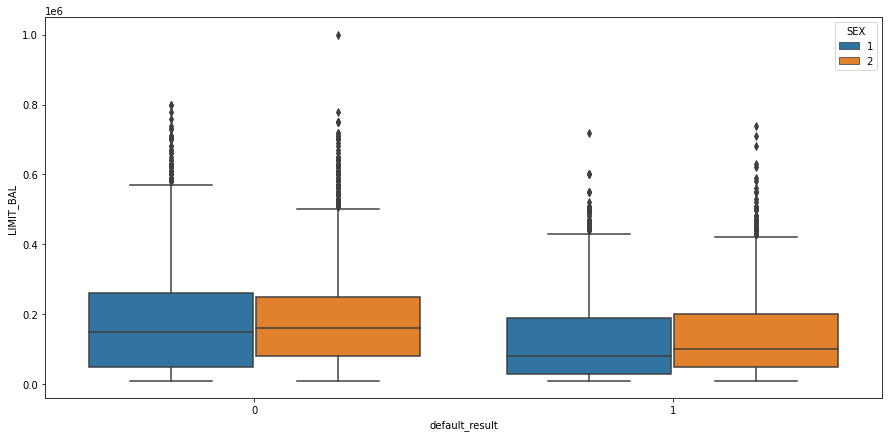

In [29]:
sns.boxplot(x='default_result',hue='SEX', y='LIMIT_BAL',data=df_fixed)

<AxesSubplot: xlabel='default_result', ylabel='LIMIT_BAL'>

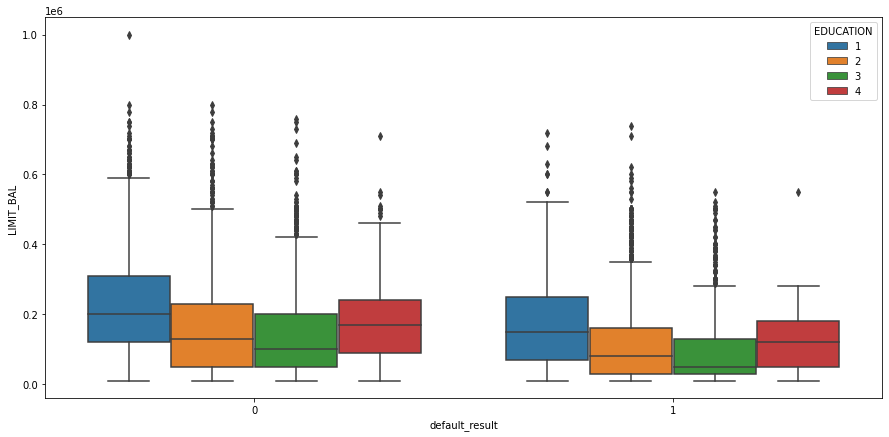

In [30]:
sns.boxplot(x='default_result',hue='EDUCATION', y='LIMIT_BAL',data=df_fixed)

<AxesSubplot: xlabel='default_result', ylabel='LIMIT_BAL'>

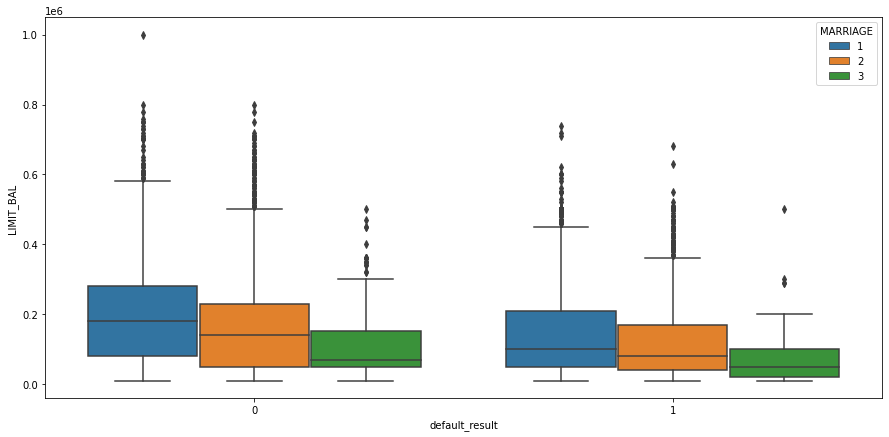

In [31]:
sns.boxplot(x='default_result',hue='MARRIAGE', y='LIMIT_BAL',data=df_fixed)

<AxesSubplot: xlabel='AGE', ylabel='LIMIT_BAL'>

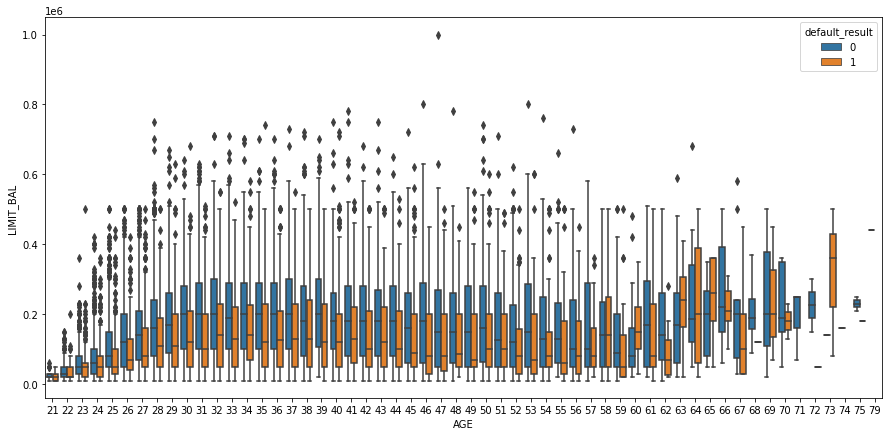

In [32]:
sns.boxplot(x='AGE',hue='default_result', y='LIMIT_BAL',data=df_fixed)

<AxesSubplot: xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

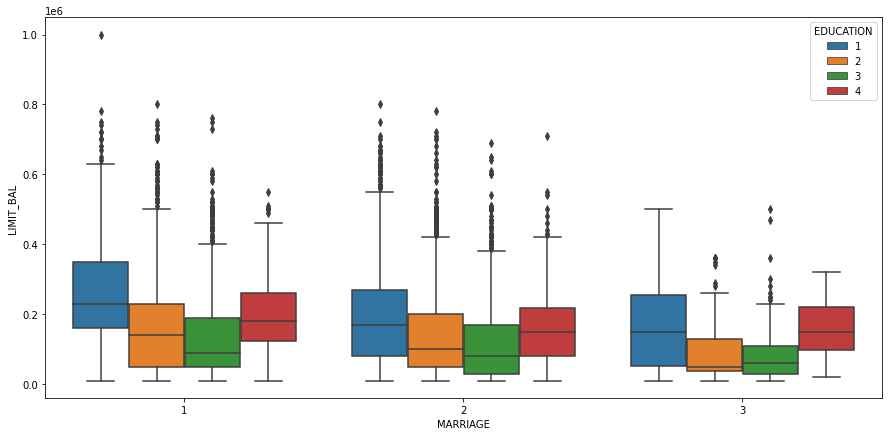

In [33]:
sns.boxplot(x='MARRIAGE',hue='EDUCATION', y='LIMIT_BAL',data=df_fixed)

Having plotted the boxplots, it is apparent that the data contains outliers

# Outliers

In [34]:
# defining numerical features of the dataset
numerical_features = ['LIMIT_BAL', 'AGE'] + list(df_new.columns[14:26])

# obtaining the outliers of the dataset
def outlier_calc(data, feature):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    lower_bound = data[feature].quantile(0.25) - 1.5 * IQR
    upper_bound = data[feature].quantile(0.75) + 1.5 * IQR
    outliers = data.index[ (data[feature] < lower_bound) | (data[feature] > upper_bound) ]
    return outliers

list_of_outliers = []
for ft in numerical_features:
    list_of_outliers.extend(outlier_calc(df_new, ft))

def removeoutliers(data, outliers):
    outliers = sorted(set(outliers))
    data = data.drop(outliers)
    return data

df_cleaned = removeoutliers(df_new, list_of_outliers)
df_cleaned

,LIMIT_BAL,SEX_1,SEX_2,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE,PAY_1,PAY_2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,0,1,2,1,0,0,24,2,2,...,0,0,0,0,689,0,0,0,0,1
2,120000,0,1,2,0,1,0,26,-1,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,0,1,2,0,1,0,34,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,0,1,2,1,0,0,37,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,50000,1,0,1,0,1,0,37,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,210000,1,0,2,1,0,0,34,3,2,...,2500,2500,2500,0,0,0,0,0,0,1
29993,10000,1,0,3,1,0,0,43,0,0,...,0,0,0,2000,0,0,0,0,0,0
29995,80000,1,0,2,0,1,0,34,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1


In [35]:
df_new = df_cleaned

# Preparation for model training - creating X and y

In [36]:
# defining X and y variables for model training

X = df_new.drop(['default_result'], axis=1).copy() # all variables that act as features
y = df_new['default_result'].copy() # target variable


# Transformations

Having inspected the dataset, it is apparent that there is a signifcant amount of variables with the value of 0. For example, a log transformation to normalise the data is not possible, nor is square root transformation. These transformations are mostly applied to normalise skewed data, however applying these transformations to the data at hand, would not be beneficial.

# Scaling of data

In [37]:
# importing necessary libraries to perform splitting of dataset into train and test portion
# train data will be used to train the model
# test data will be used to evaluate how well the trained model generalises on unseen data
from sklearn.model_selection import train_test_split
# apply scaling in order to scale each feature to be between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,LIMIT_BAL,SEX_1,SEX_2,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE,PAY_1,PAY_2,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.019608,0.0,1.0,0.333333,1.0,0.0,0.0,0.076923,0.4,0.4,...,0.095370,0.102289,0.139739,0.168842,0.000000,0.062636,0.000000,0.000000,0.000000,0.000000
1,0.215686,0.0,1.0,0.333333,0.0,1.0,0.0,0.128205,0.1,0.4,...,0.107485,0.123760,0.163576,0.190936,0.000000,0.090909,0.090351,0.101502,0.000000,0.201066
2,0.156863,0.0,1.0,0.333333,0.0,1.0,0.0,0.333333,0.2,0.2,...,0.173605,0.196329,0.242870,0.274191,0.137078,0.136364,0.090351,0.101502,0.100442,0.502664
3,0.078431,0.0,1.0,0.333333,1.0,0.0,0.0,0.410256,0.2,0.2,...,0.390812,0.288086,0.339536,0.369033,0.180603,0.183545,0.108421,0.111652,0.107372,0.100533
4,0.078431,1.0,0.0,0.000000,0.0,1.0,0.0,0.410256,0.2,0.2,...,0.441370,0.229553,0.275096,0.304511,0.225754,0.165000,0.059360,0.101502,0.100442,0.080426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18873,0.392157,1.0,0.0,0.333333,1.0,0.0,0.0,0.333333,0.5,0.4,...,0.106379,0.118694,0.156987,0.185780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18874,0.000000,1.0,0.0,0.666667,1.0,0.0,0.0,0.564103,0.2,0.2,...,0.091182,0.102289,0.139739,0.168842,0.180603,0.000000,0.000000,0.000000,0.000000,0.000000
18875,0.137255,1.0,0.0,0.333333,0.0,1.0,0.0,0.333333,0.4,0.4,...,0.573742,0.610970,0.709670,0.718715,0.632111,0.318182,0.000000,0.710516,0.000000,0.402131
18876,0.274510,1.0,0.0,0.666667,0.0,1.0,0.0,0.564103,0.1,0.1,...,0.112470,0.161209,0.175546,0.168842,0.165884,0.320545,0.812974,0.013094,0.000000,0.000000


# Training/testing split of dataset

In [38]:
# splitting the dataset so that 80% of the data is for training and 20% of the data is for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Data Balance 

In [39]:
# need to perform upsampling/downsampling due imbalance
imbalance = df_new['default_result'].value_counts().rename_axis('default_result').to_frame('count')
imbalance

,count
default_result,
0,14099
1,4779


It is necessary to perform upsampling/downsampling due to the present data imbalance in the dataset. This is essential because an imbalanced dataset can lead to a biased model which is caused by the skew in the distribution that is present in imbalanced classes. This means that the model will focus mostly on training using the class that has more data points (this is the majority class). This will lead to an inaccurate representation of the minority class which in turn will result in low accuracy and poor generalisation of the model.

Both upsamling and downsampling will be performed and a decision on which is more suitable will be made be determined by the performance metrics.

In [40]:
# joining X_train and y_train for upsampling and downsampling
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

,LIMIT_BAL,SEX_1,SEX_2,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE,PAY_1,PAY_2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
0,0.019608,0.0,1.0,0.333333,1.0,0.0,0.0,0.076923,0.4,0.4,...,0.102289,0.139739,0.168842,0.000000,0.062636,0.000000,0.000000,0.000000,0.000000,NaN
1,0.215686,0.0,1.0,0.333333,0.0,1.0,0.0,0.128205,0.1,0.4,...,0.123760,0.163576,0.190936,0.000000,0.090909,0.090351,0.101502,0.000000,0.201066,1.0
2,0.156863,0.0,1.0,0.333333,0.0,1.0,0.0,0.333333,0.2,0.2,...,0.196329,0.242870,0.274191,0.137078,0.136364,0.090351,0.101502,0.100442,0.502664,1.0
3,0.078431,0.0,1.0,0.333333,1.0,0.0,0.0,0.410256,0.2,0.2,...,0.288086,0.339536,0.369033,0.180603,0.183545,0.108421,0.111652,0.107372,0.100533,0.0
4,0.078431,1.0,0.0,0.000000,0.0,1.0,0.0,0.410256,0.2,0.2,...,0.229553,0.275096,0.304511,0.225754,0.165000,0.059360,0.101502,0.100442,0.080426,0.0


In [41]:
# checking data imbalance for the train data
imbalance_X_train = train_data['default_result'].value_counts().rename_axis('default_result').to_frame('count')
print('Imbalance between 0 and 1 of the training data')
imbalance_X_train

Imbalance between 0 and 1 of the training data


,count
default_result,
0.0,11256
1.0,3846


In [42]:
# defining the majority and minority classes
majority = train_data[train_data['default_result']==0]
minority = train_data[train_data['default_result']==1]
print('Majority class size:', majority.shape[0])
print('Minority class size:', minority.shape[0])

Majority class size: 11256
Minority class size: 3846


# Upsampling

In [43]:
from imblearn.over_sampling import RandomOverSampler

random_over_sampler = RandomOverSampler(random_state=33)

X_train_upsampled, y_train_upsampled = random_over_sampler.fit_resample(X_train, y_train)

y_train_upsampled.value_counts()

0    11256
1    11256
Name: default_result, dtype: int64

# Downsampling

In [44]:
from imblearn.under_sampling import RandomUnderSampler

random_under_sampler = RandomUnderSampler(random_state=33)
X_train_downsampled, y_train_downsampled = random_under_sampler.fit_resample(X_train, y_train)

y_train_downsampled.value_counts()

0    3846
1    3846
Name: default_result, dtype: int64

# Sampling method selection using Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

# defining the model
logreg_model = LogisticRegression(random_state=33)

# fitting the model
logreg_model.fit(X_train, y_train)

# predicted output by model, ie predicted probability
y_pred = logreg_model.predict(X_test)

# metrics calculations
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def metrics_calc(y_test_met, y_pred_met):
    accuracy = accuracy_score(y_test_met, y_pred_met)
    recall = recall_score(y_test_met, y_pred_met)
    precision = precision_score(y_test_met, y_pred_met)
    f1score = f1_score(y_test_met, y_pred_met)
    roc = roc_auc_score(y_test_met, y_pred_met)
    performance_metrics = pd.DataFrame([['Logistic Regression', accuracy, recall, precision, f1score, roc]], columns = ['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score','ROC'])
    return performance_metrics

# confusion matrix

from sklearn import metrics

def cm(y_test_cm, y_pred_cm, data):
    confusionmatrix = metrics.confusion_matrix(y_test_cm, y_pred_cm)
    plt.figure(figsize=(5,5))
    sns.heatmap(confusionmatrix, annot=True, fmt=".0f",linewidths=.6, square = True, cmap='plasma')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    title = 'Confusion matrix for ' + data + '\n Model: Logistic Regression'
    plt.title(title, size = 9)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=33)

,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Logistic Regression,0.789725,0.293676,0.669927,0.408346,0.623096


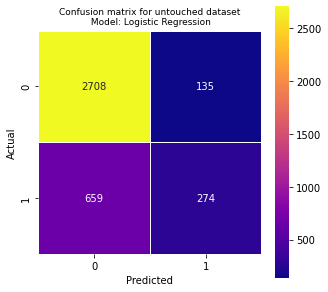

In [46]:
# metrics for logistic regression with untouched dataset
metrics_calc(y_test, y_pred)

cm(y_test, y_pred, 'untouched dataset')

# Upsampled Model

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=33)

,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Logistic Regression,0.71054,0.647374,0.44152,0.524989,0.689322


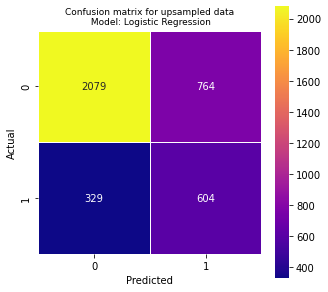

In [47]:
# fitting the model
logreg_model.fit(X_train_upsampled, y_train_upsampled)

# predicted output by model
y_pred_up = logreg_model.predict(X_test)

metrics_calc(y_test, y_pred_up)
cm(y_test, y_pred_up, 'upsampled data')

# Downsampled Model

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=33)

,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Logistic Regression,0.698888,0.651661,0.428169,0.516787,0.683024


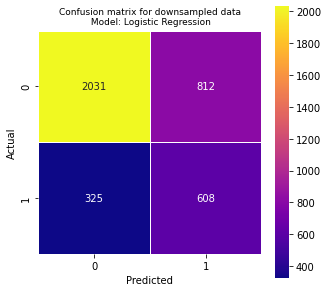

In [48]:
# fitting the model
logreg_model.fit(X_train_downsampled, y_train_downsampled)

# predicted output by model
y_pred_down = logreg_model.predict(X_test)

metrics_calc(y_test, y_pred_down)
cm(y_test, y_pred_down, 'downsampled data')

# Testing other sampling methods

In [132]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

samplers = [
    SMOTE(random_state=33),
    BorderlineSMOTE(random_state=33),
    SVMSMOTE(random_state=33),
    SMOTEENN(random_state=33),
    SMOTETomek(random_state=33)
]

for s in samplers:
    x_resampled, y_resampled = s.fit_resample(X_train, y_train)
    logreg_model = LogisticRegression(random_state=33)
    logreg_model.fit(x_resampled, y_resampled)
    y_pred = logreg_model.predict(X_test)
    print(s)
    metrics_calc(y_test, y_pred, 'Logistic Regression', 'resampled test')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=33)

SMOTE(random_state=33)


,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Logistic Regression - resampled test,0.692797,0.651661,0.421344,0.511785,0.678979


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=33)

BorderlineSMOTE(random_state=33)


,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Logistic Regression - resampled test,0.659163,0.678457,0.390741,0.495887,0.665644


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=33)

SVMSMOTE(random_state=33)


,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Logistic Regression - resampled test,0.721928,0.637728,0.455241,0.53125,0.693644


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=33)

SMOTEENN(random_state=33)


,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Logistic Regression - resampled test,0.580244,0.77492,0.344614,0.47707,0.645638


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=33)

SMOTETomek(random_state=33)


,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Logistic Regression - resampled test,0.694121,0.652733,0.422917,0.513274,0.680218


After doing a couple of initial tests to see how the model performs with the use of various resampling methods, the SVMSMOTE one seems to perform the best as it has the highest accuracy, ROC and the f1 score. The second best synthetic sampler shows to be SMOTE. Due to the fact that SVMSMOTE takes significantly longer to run than the SMOTE over sampler, it will not be used for the model training due to being too computationally intensive. There is not a large trade off in performance by choosing the SMOTE over sampling however it takes a shorter time to run.

# SMOTE resampling

In [129]:
SMOTE_resampler = SMOTE(random_state=33)
X_train_SMOTE, y_train_SMOTE = SMOTE_resampler.fit_resample(X_train, y_train)

y_train_SMOTE.value_counts()

0    11256
1    11256
Name: default_result, dtype: int64

# Model Training

# Logistic Regression

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import scikitplot as skplt
from yellowbrick.classifier.rocauc import roc_auc

# metrics calculations
def metrics_calc(y_test_met, y_pred_met, model_, data_):
    accuracy = accuracy_score(y_test_met, y_pred_met)
    recall = recall_score(y_test_met, y_pred_met)
    precision = precision_score(y_test_met, y_pred_met)
    f1score = f1_score(y_test_met, y_pred_met)
    roc = roc_auc_score(y_test_met, y_pred_met)
    model_data = model_ + ' - ' + data_
    performance_metrics = pd.DataFrame([[model_data, accuracy, recall, precision, f1score, roc]], columns = ['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score','ROC'])
    return performance_metrics

# confusion matrix
def cm(y_test_cm, y_pred_cm, data, model):
    confusionmatrix = metrics.confusion_matrix(y_test_cm, y_pred_cm)
    plt.figure(figsize=(5,5))
    sns.heatmap(confusionmatrix, annot=True, fmt=".0f",linewidths=.6, square = True, cmap='plasma')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    title = 'Confusion matrix for ' + data + '\n Model:'+ model
    plt.title(title, size = 9)
    plt.show()

# https://betterdatascience.com/feature-importance-python/
# obtaining feature importances for logistic regression
def importance_log_reg(xtrain, model, data):
    plt.figure(figsize=(8, 6), dpi=80)
    f_importance = pd.DataFrame(data={'Attribute': xtrain.columns,'Importance': model.coef_[0]})
    f_importance = f_importance.sort_values(by='Importance', ascending=False)
    plt.bar(x=f_importance['Attribute'], height=f_importance['Importance'])
    title = 'Feature importances using coefficients for Logistic Regression model: \n' + data
    plt.title(title, size=10)
    plt.xticks(rotation='vertical')
    plt.show()

# cross validation
def cross_val(model, Xtrain, ytrain): 
    cv = KFold(n_splits=10, random_state=33, shuffle=True)
    score_kfold = cross_val_score(model, Xtrain, ytrain, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy using kFold cross-validation: mean =' + str(round((mean(score_kfold)), 3)) + ', std =' + str(round((std(score_kfold)), 3)))
    for i, score in enumerate(cross_val_score(model, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)):
        print(f"MSE for  fold no. {i} using the test set: {score}")

def gains_lift(model):
    y_test_predproba = model.predict_proba(X_test)
    skplt.metrics.plot_cumulative_gain(y_test, y_test_predproba)
    skplt.metrics.plot_lift_curve(y_test, y_test_predproba)

# Logistic regression - original data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      2843
           1       0.67      0.29      0.41       933

    accuracy                           0.79      3776
   macro avg       0.74      0.62      0.64      3776
weighted avg       0.77      0.79      0.76      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Logistic Regression - untouched dataset,0.789725,0.293676,0.669927,0.408346,0.623096


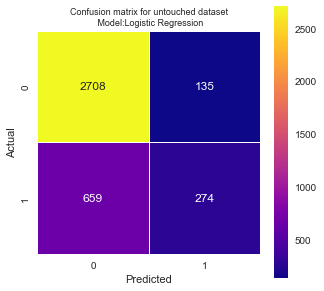

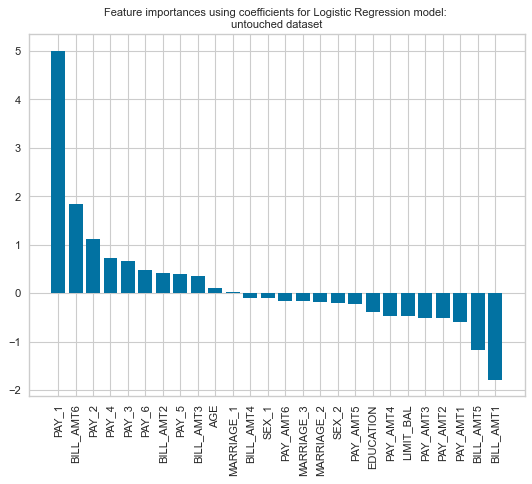

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Accuracy using kFold cross-validation: mean =0.787, std =0.008


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

MSE for  fold no. 0 using the test set: -0.22104566512243548
MSE for  fold no. 1 using the test set: -0.2183984116479153
MSE for  fold no. 2 using the test set: -0.2052980132450331
MSE for  fold no. 3 using the test set: -0.21788079470198676
MSE for  fold no. 4 using the test set: -0.22847682119205298
MSE for  fold no. 5 using the test set: -0.2119205298013245
MSE for  fold no. 6 using the test set: -0.20596026490066224
MSE for  fold no. 7 using the test set: -0.20198675496688742
MSE for  fold no. 8 using the test set: -0.2052980132450331
MSE for  fold no. 9 using the test set: -0.2119205298013245


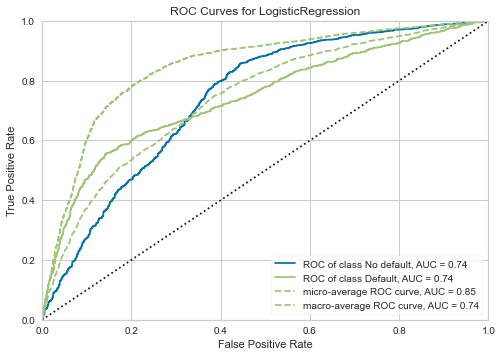

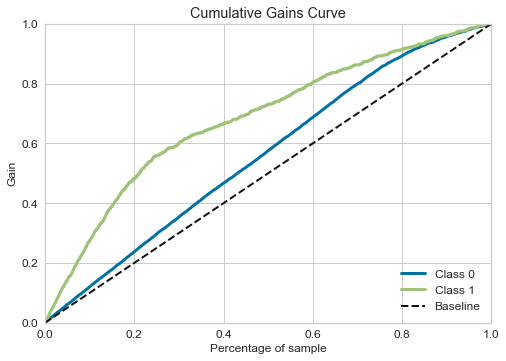

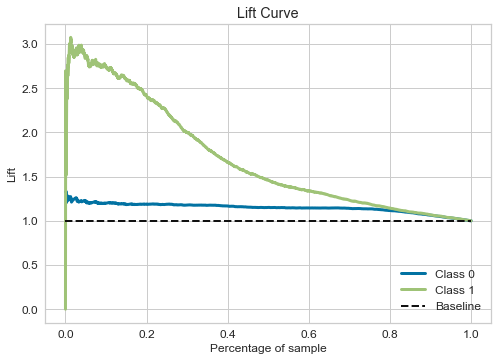

In [67]:
# defining the model
logreg_model = LogisticRegression()

# fitting the model
logreg_model.fit(X_train, y_train)

# predicted output by model, ie predicted probability
y_pred = logreg_model.predict(X_test)

#classification report
print(classification_report(y_test, y_pred))

# performance metrics for untouched dataset
metrics_calc(y_test, y_pred, 'Logistic Regression', 'untouched dataset')

# confusion matric for untouched dataset
cm(y_test, y_pred, 'untouched dataset','Logistic Regression')

# feature importance
importance_log_reg(X_train, logreg_model, 'untouched dataset')

# cross validation
cross_val(logreg_model, X_train, y_train)

# ROC curve
roc = roc_auc(logreg_model, X_train, y_train,X_test,y_test,classes=['No default', 'Default'])

# plotting of gains and lift curve
gains_lift(logreg_model)

# Logistic Regression - upsampled data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      2843
           1       0.44      0.65      0.52       933

    accuracy                           0.71      3776
   macro avg       0.65      0.69      0.66      3776
weighted avg       0.76      0.71      0.73      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Logistic Regression - upsampled dataset,0.71054,0.647374,0.44152,0.524989,0.689322


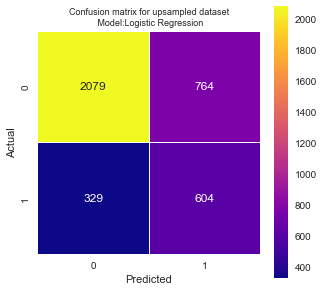

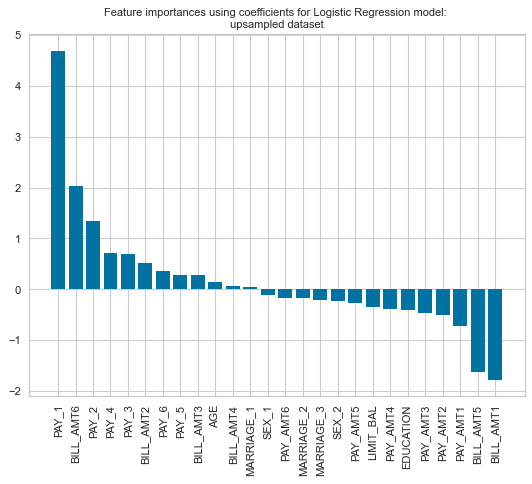

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Accuracy using kFold cross-validation: mean =0.688, std =0.01


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

MSE for  fold no. 0 using the test set: -0.31838365896980464
MSE for  fold no. 1 using the test set: -0.31127886323268206
MSE for  fold no. 2 using the test set: -0.3274100399822301
MSE for  fold no. 3 using the test set: -0.31941359395824076
MSE for  fold no. 4 using the test set: -0.3176366059529098
MSE for  fold no. 5 using the test set: -0.30830741892492225
MSE for  fold no. 6 using the test set: -0.3167481119502443
MSE for  fold no. 7 using the test set: -0.3118613949355842
MSE for  fold no. 8 using the test set: -0.29764549089293646
MSE for  fold no. 9 using the test set: -0.2914260328742781


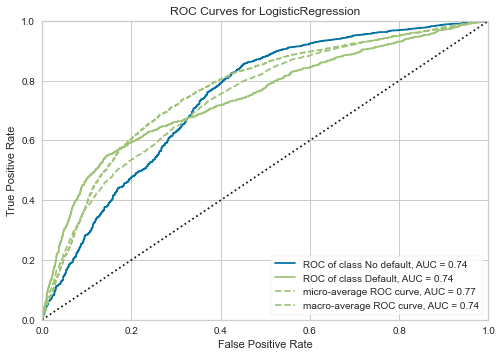

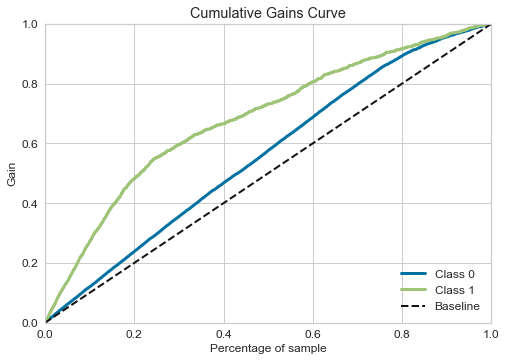

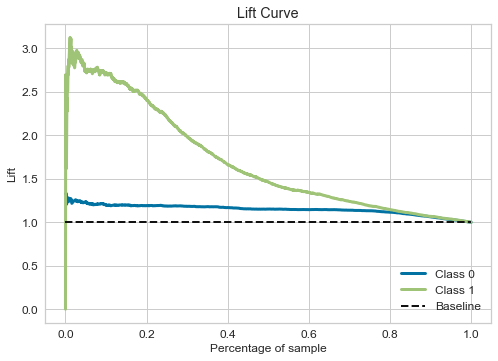

In [68]:
# defining the model
logreg_model_upsampled = LogisticRegression()

# fitting the model
logreg_model_upsampled.fit(X_train_upsampled, y_train_upsampled)

# predicted output by model, ie predicted probability
y_pred_upsampled = logreg_model_upsampled.predict(X_test)

#classification report
print(classification_report(y_test, y_pred_upsampled))

# performance metrics for upsampled dataset
metrics_calc(y_test, y_pred_upsampled, 'Logistic Regression', 'upsampled dataset')

# confusion matrix for upsampled dataset
cm(y_test, y_pred_upsampled, 'upsampled dataset', 'Logistic Regression')

# feature importance
importance_log_reg(X_train, logreg_model_upsampled, 'upsampled dataset')

# cross validation
cross_val(logreg_model_upsampled, X_train_upsampled, y_train_upsampled)

# ROC curve
roc = roc_auc(logreg_model_upsampled, X_train, y_train,X_test,y_test,classes=['No default', 'Default'])

# plotting of gains and lift curve
gains_lift(logreg_model_upsampled)

# Logistic Regression - downsampled data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

              precision    recall  f1-score   support

           0       0.86      0.71      0.78      2843
           1       0.43      0.65      0.52       933

    accuracy                           0.70      3776
   macro avg       0.65      0.68      0.65      3776
weighted avg       0.75      0.70      0.72      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Logistic Regression - downsampled dataset,0.698888,0.651661,0.428169,0.516787,0.683024


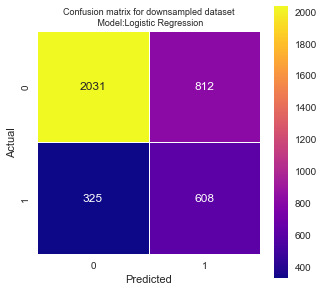

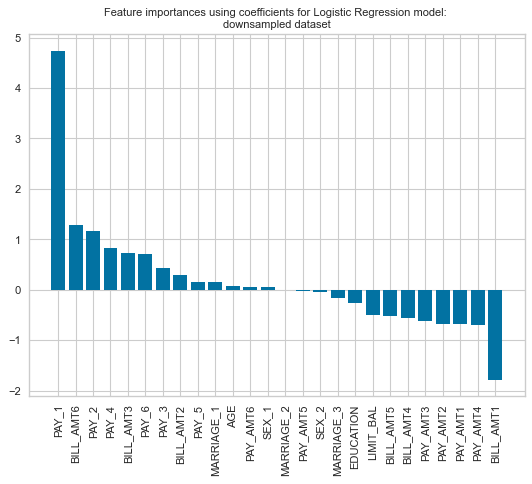

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Accuracy using kFold cross-validation: mean =0.688, std =0.018


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

MSE for  fold no. 0 using the test set: -0.3142857142857143
MSE for  fold no. 1 using the test set: -0.2792207792207792
MSE for  fold no. 2 using the test set: -0.328998699609883
MSE for  fold no. 3 using the test set: -0.3237971391417425
MSE for  fold no. 4 using the test set: -0.3328998699609883
MSE for  fold no. 5 using the test set: -0.29908972691807545
MSE for  fold no. 6 using the test set: -0.28738621586475943
MSE for  fold no. 7 using the test set: -0.31339401820546164
MSE for  fold no. 8 using the test set: -0.3107932379713914
MSE for  fold no. 9 using the test set: -0.33159947984395316


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


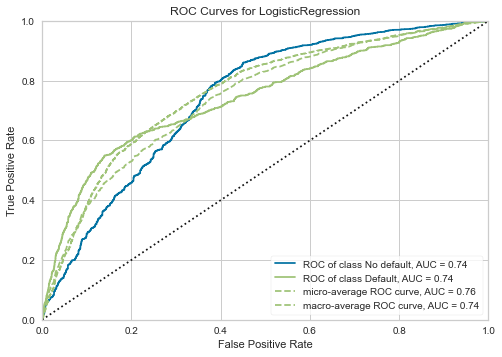

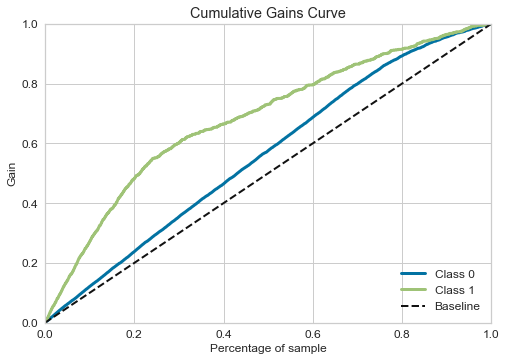

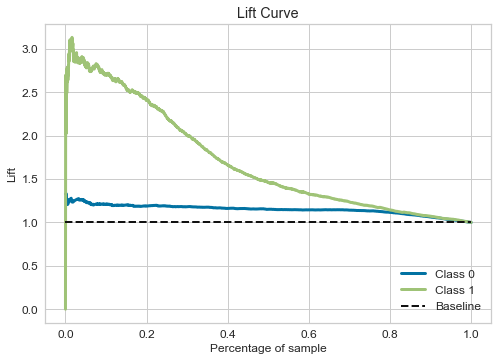

In [69]:
# defining the model
logreg_model_downsampled = LogisticRegression()

# fitting the model
logreg_model_downsampled.fit(X_train_downsampled, y_train_downsampled)

# predicted output by model, ie predicted probability
y_pred_downsampled = logreg_model_downsampled.predict(X_test)

#classification report
print(classification_report(y_test, y_pred_downsampled))

# performance metrics for downsampled dataset
metrics_calc(y_test, y_pred_downsampled, 'Logistic Regression', 'downsampled dataset')

# confusion matrix for downsampled dataset
cm(y_test, y_pred_downsampled, 'downsampled dataset', 'Logistic Regression')

# feature importance
importance_log_reg(X_train, logreg_model_downsampled, 'downsampled dataset')

# cross validation
cross_val(logreg_model_downsampled, X_train_downsampled, y_train_downsampled)

# ROC curve
roc = roc_auc(logreg_model_downsampled, X_train, y_train,X_test,y_test,classes=['No default', 'Default'])

# plotting of gains and lift curve
gains_lift(logreg_model_downsampled)

# Logistic Regression - SMOTE resampled data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

              precision    recall  f1-score   support

           0       0.86      0.71      0.78      2843
           1       0.42      0.65      0.51       933

    accuracy                           0.69      3776
   macro avg       0.64      0.68      0.64      3776
weighted avg       0.75      0.69      0.71      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Logistic Regression - SMOTE dataset,0.692797,0.651661,0.421344,0.511785,0.678979


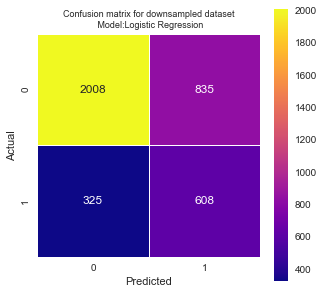

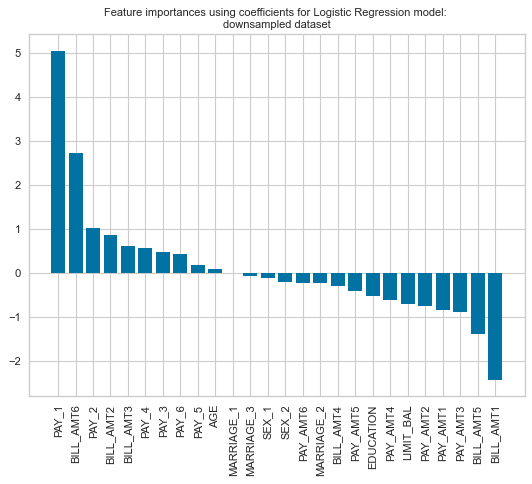

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Accuracy using kFold cross-validation: mean =0.689, std =0.01


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

MSE for  fold no. 0 using the test set: -0.3174955595026643
MSE for  fold no. 1 using the test set: -0.3210479573712256
MSE for  fold no. 2 using the test set: -0.3260772989782319
MSE for  fold no. 3 using the test set: -0.3167481119502443
MSE for  fold no. 4 using the test set: -0.3163038649489116
MSE for  fold no. 5 using the test set: -0.30075521990226567
MSE for  fold no. 6 using the test set: -0.3047534429142603
MSE for  fold no. 7 using the test set: -0.3123056419369169
MSE for  fold no. 8 using the test set: -0.3003109729009329
MSE for  fold no. 9 using the test set: -0.29631274988893824


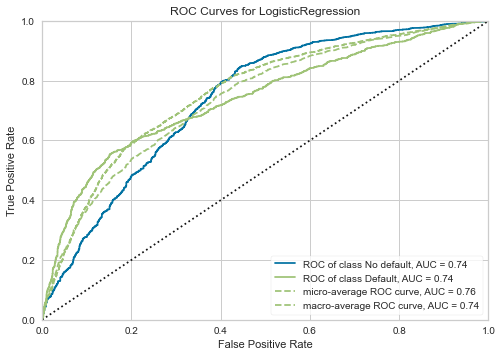

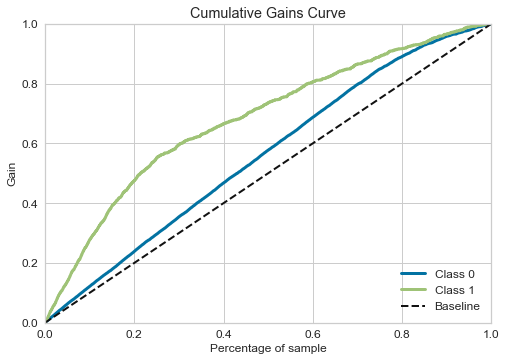

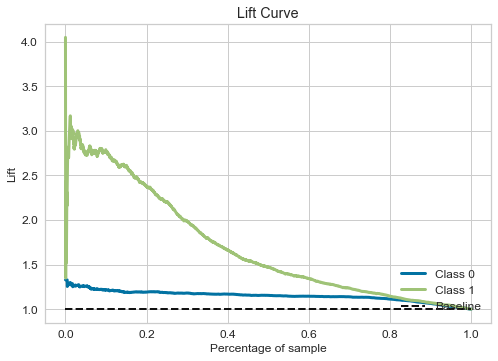

In [70]:
# defining the model
logreg_model_SMOTE = LogisticRegression()

# fitting the model
logreg_model_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

# predicted output by model, ie predicted probability
y_pred_SMOTE = logreg_model_SMOTE.predict(X_test)

#classification report
print(classification_report(y_test, y_pred_SMOTE))

# performance metrics for SMOTE dataset
metrics_calc(y_test, y_pred_SMOTE, 'Logistic Regression', 'SMOTE dataset')

# confusion matric for SMOTE dataset
cm(y_test, y_pred_SMOTE, 'downsampled dataset', 'Logistic Regression')

# feature importance
importance_log_reg(X_train, logreg_model_SMOTE, 'downsampled dataset')

# cross validation
cross_val(logreg_model_SMOTE, X_train_SMOTE, y_train_SMOTE)

# ROC curve
roc = roc_auc(logreg_model_SMOTE, X_train, y_train,X_test,y_test,classes=['No default', 'Default'])

# plotting of gains and lift curve
gains_lift(logreg_model_SMOTE)

# Logistic Regression - Hyperparameter Tuning: GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV

The best performing logistic regression model was the one that was trained on the upsampled dataset, therefore hyperparameter tuning shall be performed on this model with the use of GridSearchCV.

In [73]:
print('Parameters in use:\n')
print(logreg_model_upsampled.get_params())

Parameters in use:

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [74]:
# hyperparameter grid for tuning
c_space = np.logspace(-5, 8, 15)
p = ['l1','l2']
param_grid = {'C': c_space, 'penalty': p}

# Logistic regression classifier: logreg_model_upsampled

# GridSearchCV object: logreg_model_upsampled
logreg_cv = GridSearchCV(logreg_model_upsampled, param_grid, verbose=10, cv=5)

# Fit it to the data
logreg_cv.fit(X_train_upsampled, y_train_upsampled)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START C=1e-05, penalty=l1........................................
[CV 1/5; 1/30] END ...........C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 1/30] START C=1e-05, penalty=l1........................................
[CV 2/5; 1/30] END ...........C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 1/30] START C=1e-05, penalty=l1........................................
[CV 3/5; 1/30] END ...........C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 1/30] START C=1e-05, penalty=l1........................................
[CV 4/5; 1/30] END ...........C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 1/30] START C=1e-05, penalty=l1........................................
[CV 5/5; 1/30] END ...........C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 2/30] START C=1e-05, penalty=l2........................................
[CV 1/5; 2/30] END .........C=1e-05, penalty=l2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 1/5; 12/30] END C=0.4393970560760795, penalty=l2;, score=0.688 total time=   0.2s
[CV 2/5; 12/30] START C=0.4393970560760795, penalty=l2..........................
[CV 2/5; 12/30] END C=0.4393970560760795, penalty=l2;, score=0.697 total time=   0.2s
[CV 3/5; 12/30] START C=0.4393970560760795, penalty=l2..........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 3/5; 12/30] END C=0.4393970560760795, penalty=l2;, score=0.693 total time=   0.1s
[CV 4/5; 12/30] START C=0.4393970560760795, penalty=l2..........................
[CV 4/5; 12/30] END C=0.4393970560760795, penalty=l2;, score=0.690 total time=   0.1s
[CV 5/5; 12/30] START C=0.4393970560760795, penalty=l2..........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 5/5; 12/30] END C=0.4393970560760795, penalty=l2;, score=0.674 total time=   0.2s
[CV 1/5; 13/30] START C=3.727593720314938, penalty=l1...........................
[CV 1/5; 13/30] END C=3.727593720314938, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 13/30] START C=3.727593720314938, penalty=l1...........................
[CV 2/5; 13/30] END C=3.727593720314938, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 13/30] START C=3.727593720314938, penalty=l1...........................
[CV 3/5; 13/30] END C=3.727593720314938, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 13/30] START C=3.727593720314938, penalty=l1...........................
[CV 4/5; 13/30] END C=3.727593720314938, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 13/30] START C=3.727593720314938, penalty=l1...........................
[CV 5/5; 13/30] END C=3.727593720314938, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 14/30] START C=3.727593720314938, penalty=l2...........................
[CV 1/5; 14/3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 2/5; 14/30] END C=3.727593720314938, penalty=l2;, score=0.695 total time=   0.2s
[CV 3/5; 14/30] START C=3.727593720314938, penalty=l2...........................
[CV 3/5; 14/30] END C=3.727593720314938, penalty=l2;, score=0.694 total time=   0.1s
[CV 4/5; 14/30] START C=3.727593720314938, penalty=l2...........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 4/5; 14/30] END C=3.727593720314938, penalty=l2;, score=0.689 total time=   0.2s
[CV 5/5; 14/30] START C=3.727593720314938, penalty=l2...........................
[CV 5/5; 14/30] END C=3.727593720314938, penalty=l2;, score=0.676 total time=   0.1s
[CV 1/5; 15/30] START C=31.622776601683793, penalty=l1..........................
[CV 1/5; 15/30] END C=31.622776601683793, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 15/30] START C=31.622776601683793, penalty=l1..........................
[CV 2/5; 15/30] END C=31.622776601683793, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 15/30] START C=31.622776601683793, penalty=l1..........................
[CV 3/5; 15/30] END C=31.622776601683793, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 15/30] START C=31.622776601683793, penalty=l1..........................
[CV 4/5; 15/30] END C=31.622776601683793, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 15/30] START C=31.622776601683793, penalty=l1..........................
[CV 5/5;

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 1/5; 16/30] END C=31.622776601683793, penalty=l2;, score=0.688 total time=   0.2s
[CV 2/5; 16/30] START C=31.622776601683793, penalty=l2..........................
[CV 2/5; 16/30] END C=31.622776601683793, penalty=l2;, score=0.695 total time=   0.2s
[CV 3/5; 16/30] START C=31.622776601683793, penalty=l2..........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 16/30] END C=31.622776601683793, penalty=l2;, score=0.693 total time=   0.6s
[CV 4/5; 16/30] START C=31.622776601683793, penalty=l2..........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 16/30] END C=31.622776601683793, penalty=l2;, score=0.689 total time=   0.4s
[CV 5/5; 16/30] START C=31.622776601683793, penalty=l2..........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 16/30] END C=31.622776601683793, penalty=l2;, score=0.676 total time=   0.3s
[CV 1/5; 17/30] START C=268.2695795279727, penalty=l1...........................
[CV 1/5; 17/30] END C=268.2695795279727, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 17/30] START C=268.2695795279727, penalty=l1...........................
[CV 2/5; 17/30] END C=268.2695795279727, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 17/30] START C=268.2695795279727, penalty=l1...........................
[CV 3/5; 17/30] END C=268.2695795279727, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 17/30] START C=268.2695795279727, penalty=l1...........................
[CV 4/5; 17/30] END C=268.2695795279727, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 17/30] START C=268.2695795279727, penalty=l1...........................
[CV 5/5; 17/30] END C=268.2695795279727, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 18/30] START C=268.2695795279727, penalty=l2...........................
[CV 1/5; 18/3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 3/5; 18/30] END C=268.2695795279727, penalty=l2;, score=0.694 total time=   0.2s
[CV 4/5; 18/30] START C=268.2695795279727, penalty=l2...........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 4/5; 18/30] END C=268.2695795279727, penalty=l2;, score=0.688 total time=   0.2s
[CV 5/5; 18/30] START C=268.2695795279727, penalty=l2...........................
[CV 5/5; 18/30] END C=268.2695795279727, penalty=l2;, score=0.676 total time=   0.2s
[CV 1/5; 19/30] START C=2275.845926074791, penalty=l1...........................
[CV 1/5; 19/30] END C=2275.845926074791, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 19/30] START C=2275.845926074791, penalty=l1...........................
[CV 2/5; 19/30] END C=2275.845926074791, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 19/30] START C=2275.845926074791, penalty=l1...........................
[CV 3/5; 19/30] END C=2275.845926074791, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 19/30] START C=2275.845926074791, penalty=l1...........................
[CV 4/5; 19/30] END C=2275.845926074791, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 19/30] START C=2275.845926074791, penalty=l1...........................
[CV 5/5; 19/

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 1/5; 20/30] END C=2275.845926074791, penalty=l2;, score=0.688 total time=   0.2s
[CV 2/5; 20/30] START C=2275.845926074791, penalty=l2...........................
[CV 2/5; 20/30] END C=2275.845926074791, penalty=l2;, score=0.696 total time=   0.2s
[CV 3/5; 20/30] START C=2275.845926074791, penalty=l2...........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 3/5; 20/30] END C=2275.845926074791, penalty=l2;, score=0.694 total time=   0.2s
[CV 4/5; 20/30] START C=2275.845926074791, penalty=l2...........................
[CV 4/5; 20/30] END C=2275.845926074791, penalty=l2;, score=0.688 total time=   0.2s
[CV 5/5; 20/30] START C=2275.845926074791, penalty=l2...........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 5/5; 20/30] END C=2275.845926074791, penalty=l2;, score=0.676 total time=   0.2s
[CV 1/5; 21/30] START C=19306.977288832535, penalty=l1..........................
[CV 1/5; 21/30] END C=19306.977288832535, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 21/30] START C=19306.977288832535, penalty=l1..........................
[CV 2/5; 21/30] END C=19306.977288832535, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 21/30] START C=19306.977288832535, penalty=l1..........................
[CV 3/5; 21/30] END C=19306.977288832535, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 21/30] START C=19306.977288832535, penalty=l1..........................
[CV 4/5; 21/30] END C=19306.977288832535, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 21/30] START C=19306.977288832535, penalty=l1..........................
[CV 5/5; 21/30] END C=19306.977288832535, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 22/30] START C=19306.977288832535, penalty=l2..........................
[CV 1/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 2/5; 22/30] END C=19306.977288832535, penalty=l2;, score=0.695 total time=   0.2s
[CV 3/5; 22/30] START C=19306.977288832535, penalty=l2..........................
[CV 3/5; 22/30] END C=19306.977288832535, penalty=l2;, score=0.694 total time=   0.2s
[CV 4/5; 22/30] START C=19306.977288832535, penalty=l2..........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 22/30] END C=19306.977288832535, penalty=l2;, score=0.688 total time=   0.2s
[CV 5/5; 22/30] START C=19306.977288832535, penalty=l2..........................
[CV 5/5; 22/30] END C=19306.977288832535, penalty=l2;, score=0.676 total time=   0.2s
[CV 1/5; 23/30] START C=163789.3706954068, penalty=l1...........................
[CV 1/5; 23/30] END C=163789.3706954068, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 23/30] START C=163789.3706954068, penalty=l1...........................
[CV 2/5; 23/30] END C=163789.3706954068, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 23/30] START C=163789.3706954068, penalty=l1...........................
[CV 3/5; 23/30] END C=163789.3706954068, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 23/30] START C=163789.3706954068, penalty=l1...........................
[CV 4/5; 23/30] END C=163789.3706954068, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 23/30] START C=163789.3706954068, penalty=l1...........................
[CV 5/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 1/5; 24/30] END C=163789.3706954068, penalty=l2;, score=0.688 total time=   0.2s
[CV 2/5; 24/30] START C=163789.3706954068, penalty=l2...........................
[CV 2/5; 24/30] END C=163789.3706954068, penalty=l2;, score=0.695 total time=   0.2s
[CV 3/5; 24/30] START C=163789.3706954068, penalty=l2...........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 3/5; 24/30] END C=163789.3706954068, penalty=l2;, score=0.694 total time=   0.2s
[CV 4/5; 24/30] START C=163789.3706954068, penalty=l2...........................
[CV 4/5; 24/30] END C=163789.3706954068, penalty=l2;, score=0.689 total time=   0.2s
[CV 5/5; 24/30] START C=163789.3706954068, penalty=l2...........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 24/30] END C=163789.3706954068, penalty=l2;, score=0.675 total time=   0.2s
[CV 1/5; 25/30] START C=1389495.494373136, penalty=l1...........................
[CV 1/5; 25/30] END C=1389495.494373136, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 25/30] START C=1389495.494373136, penalty=l1...........................
[CV 2/5; 25/30] END C=1389495.494373136, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 25/30] START C=1389495.494373136, penalty=l1...........................
[CV 3/5; 25/30] END C=1389495.494373136, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 25/30] START C=1389495.494373136, penalty=l1...........................
[CV 4/5; 25/30] END C=1389495.494373136, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 25/30] START C=1389495.494373136, penalty=l1...........................
[CV 5/5; 25/30] END C=1389495.494373136, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 26/30] START C=1389495.494373136, penalty=l2...........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 26/30] END C=1389495.494373136, penalty=l2;, score=0.687 total time=   0.2s
[CV 2/5; 26/30] START C=1389495.494373136, penalty=l2...........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 2/5; 26/30] END C=1389495.494373136, penalty=l2;, score=0.695 total time=   0.2s
[CV 3/5; 26/30] START C=1389495.494373136, penalty=l2...........................
[CV 3/5; 26/30] END C=1389495.494373136, penalty=l2;, score=0.694 total time=   0.2s
[CV 4/5; 26/30] START C=1389495.494373136, penalty=l2...........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 26/30] END C=1389495.494373136, penalty=l2;, score=0.689 total time=   0.2s
[CV 5/5; 26/30] START C=1389495.494373136, penalty=l2...........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 26/30] END C=1389495.494373136, penalty=l2;, score=0.676 total time=   0.2s
[CV 1/5; 27/30] START C=11787686.347935867, penalty=l1..........................
[CV 1/5; 27/30] END C=11787686.347935867, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 27/30] START C=11787686.347935867, penalty=l1..........................
[CV 2/5; 27/30] END C=11787686.347935867, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 27/30] START C=11787686.347935867, penalty=l1..........................
[CV 3/5; 27/30] END C=11787686.347935867, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 27/30] START C=11787686.347935867, penalty=l1..........................
[CV 4/5; 27/30] END C=11787686.347935867, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 27/30] START C=11787686.347935867, penalty=l1..........................
[CV 5/5; 27/30] END C=11787686.347935867, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 28/30] START C=11787686.347935867, penalty=l2..........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 28/30] END C=11787686.347935867, penalty=l2;, score=0.688 total time=   0.8s
[CV 2/5; 28/30] START C=11787686.347935867, penalty=l2..........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 2/5; 28/30] END C=11787686.347935867, penalty=l2;, score=0.696 total time=   0.5s
[CV 3/5; 28/30] START C=11787686.347935867, penalty=l2..........................
[CV 3/5; 28/30] END C=11787686.347935867, penalty=l2;, score=0.694 total time=   0.2s
[CV 4/5; 28/30] START C=11787686.347935867, penalty=l2..........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 28/30] END C=11787686.347935867, penalty=l2;, score=0.689 total time=   0.5s
[CV 5/5; 28/30] START C=11787686.347935867, penalty=l2..........................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 28/30] END C=11787686.347935867, penalty=l2;, score=0.676 total time=   0.3s
[CV 1/5; 29/30] START C=100000000.0, penalty=l1.................................
[CV 1/5; 29/30] END ....C=100000000.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 29/30] START C=100000000.0, penalty=l1.................................
[CV 2/5; 29/30] END ....C=100000000.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 29/30] START C=100000000.0, penalty=l1.................................
[CV 3/5; 29/30] END ....C=100000000.0, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 29/30] START C=100000000.0, penalty=l1.................................
[CV 4/5; 29/30] END ....C=100000000.0, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 29/30] START C=100000000.0, penalty=l1.................................
[CV 5/5; 29/30] END ....C=100000000.0, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 30/30] START C=100000000.0, penalty=l2.................................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 30/30] END ..C=100000000.0, penalty=l2;, score=0.687 total time=   0.2s
[CV 2/5; 30/30] START C=100000000.0, penalty=l2.................................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 30/30] END ..C=100000000.0, penalty=l2;, score=0.695 total time=   0.3s
[CV 3/5; 30/30] START C=100000000.0, penalty=l2.................................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 30/30] END ..C=100000000.0, penalty=l2;, score=0.694 total time=   0.3s
[CV 4/5; 30/30] START C=100000000.0, penalty=l2.................................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 30/30] END ..C=100000000.0, penalty=l2;, score=0.689 total time=   0.3s
[CV 5/5; 30/30] START C=100000000.0, penalty=l2.................................


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
------------------------------------------------

[CV 5/5; 30/30] END ..C=100000000.0, penalty=l2;, score=0.676 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']},
             verbose=10)

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795, 'penalty': 'l2'}
Best score is 0.6884769056178847


# Logistic Regression - with Tuned parameters, upsampled dataset

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.4393970560760795)

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      2843
           1       0.44      0.65      0.53       933

    accuracy                           0.71      3776
   macro avg       0.65      0.69      0.66      3776
weighted avg       0.76      0.71      0.73      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Logistic Regression - upsampled dataset - TUNED,0.712394,0.646302,0.443709,0.526178,0.690193


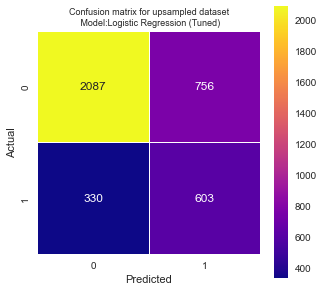

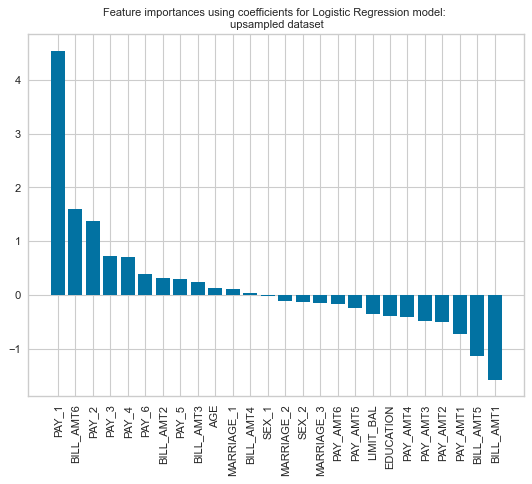

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Accuracy using kFold cross-validation: mean =0.69, std =0.01


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

MSE for  fold no. 0 using the test set: -0.3174955595026643
MSE for  fold no. 1 using the test set: -0.31216696269982236
MSE for  fold no. 2 using the test set: -0.3260772989782319
MSE for  fold no. 3 using the test set: -0.3149711239449134
MSE for  fold no. 4 using the test set: -0.3149711239449134
MSE for  fold no. 5 using the test set: -0.30786317192358953
MSE for  fold no. 6 using the test set: -0.3145268769435806
MSE for  fold no. 7 using the test set: -0.30919591292758775
MSE for  fold no. 8 using the test set: -0.2936472678809418
MSE for  fold no. 9 using the test set: -0.2905375388716126


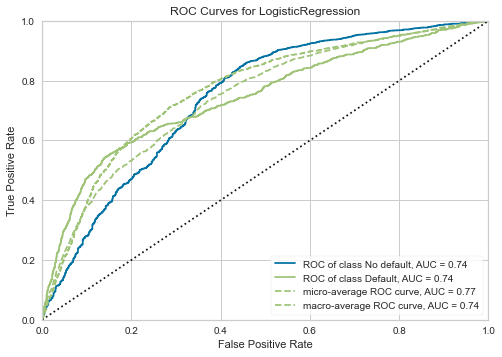

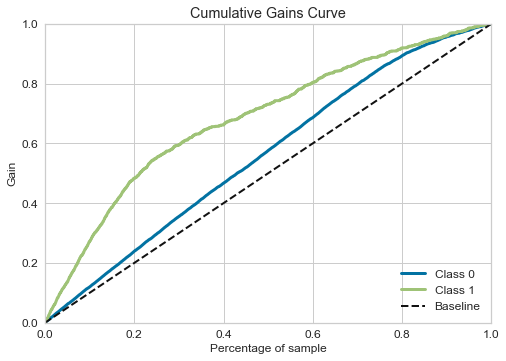

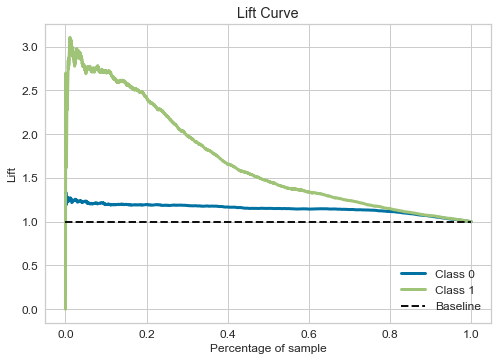

In [104]:
# defining the model
logreg_model_upsampled = LogisticRegression(C=0.4393970560760795, penalty='l2')

# fitting the model
logreg_model_upsampled.fit(X_train_upsampled, y_train_upsampled)

# predicted output by model, ie predicted probability
y_pred_upsampled = logreg_model_upsampled.predict(X_test)

#classification report
print(classification_report(y_test, y_pred_upsampled))

# performance metrics for upsampled dataset
metrics_calc(y_test, y_pred_upsampled, 'Logistic Regression', 'upsampled dataset - TUNED')

# confusion matrix for upsampled dataset
cm(y_test, y_pred_upsampled, 'upsampled dataset','Logistic Regression (Tuned)')

# feature importance
importance_log_reg(X_train, logreg_model_upsampled, 'upsampled dataset')

# cross validation
cross_val(logreg_model_upsampled, X_train_upsampled, y_train_upsampled)

# ROC curve
roc = roc_auc(logreg_model_upsampled, X_train, y_train,X_test,y_test,classes=['No default', 'Default'])

# plotting of gains and lift curve
gains_lift(logreg_model_upsampled)

In [107]:
import mlxtend
from mlxtend.evaluate import bias_variance_decomp

In [106]:
X_train_upsampled_ = X_train_upsampled.values
y_train_upsampled_ = y_train_upsampled.values
X_test_ = X_test.values
y_test_ = y_test.values
mse, bias, variance = bias_variance_decomp(logreg_model_upsampled, X_train_upsampled_, y_train_upsampled_, X_test_, y_test_, loss='mse', num_rounds=200, random_seed=33)
# summarize results
print('MSE:' , mse)
print('Bias:' , bias)
print('Variance:' , variance)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

MSE: 0.2909216101694916
Bias: 0.27384454449152545
Variance: 0.0170770656779661


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM

In [62]:
from sklearn.svm import SVC

# SVM - original data

SVC()

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2843
           1       0.67      0.35      0.46       933

    accuracy                           0.80      3776
   macro avg       0.74      0.65      0.67      3776
weighted avg       0.78      0.80      0.77      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,SVM - untouched dataset,0.797669,0.351554,0.673511,0.461972,0.647814


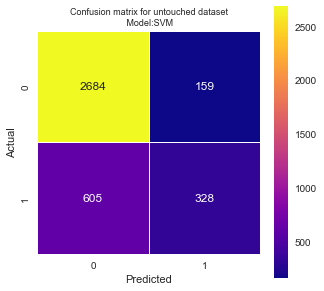

Accuracy using kFold cross-validation: mean =0.794, std =0.01
MSE for  fold no. 0 using the test set: -0.2157511581733951
MSE for  fold no. 1 using the test set: -0.20450033090668432
MSE for  fold no. 2 using the test set: -0.20397350993377483
MSE for  fold no. 3 using the test set: -0.2165562913907285
MSE for  fold no. 4 using the test set: -0.22649006622516557
MSE for  fold no. 5 using the test set: -0.1986754966887417
MSE for  fold no. 6 using the test set: -0.2052980132450331
MSE for  fold no. 7 using the test set: -0.19337748344370861
MSE for  fold no. 8 using the test set: -0.19536423841059603
MSE for  fold no. 9 using the test set: -0.19801324503311257


In [80]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_svc))

# performance metrics
metrics_calc(y_test, y_pred_svc, 'SVM', 'untouched dataset')

# confusion matrix
cm(y_test, y_pred_svc, 'untouched dataset', 'SVM')

# cross validation
cross_val(svc_model, X_train, y_train)

# SVM - upsampled data

SVC()

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2843
           1       0.54      0.59      0.56       933

    accuracy                           0.77      3776
   macro avg       0.70      0.71      0.71      3776
weighted avg       0.78      0.77      0.78      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,SVM - upsampled dataset,0.7741,0.587353,0.53937,0.56234,0.711369


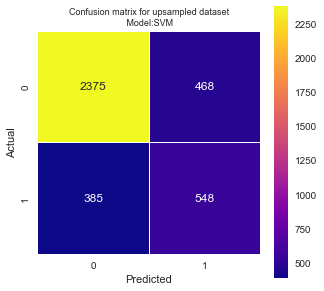

In [97]:
svc_model_upsampled = SVC()
svc_model_upsampled.fit(X_train_upsampled, y_train_upsampled)
y_pred_svc_upsampled = svc_model_upsampled.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_svc_upsampled))

# performance metrics
metrics_calc(y_test, y_pred_svc_upsampled, 'SVM', 'upsampled dataset')

# confusion matrix
cm(y_test, y_pred_svc_upsampled, 'upsampled dataset', 'SVM')

# SVM - downsampled data

SVC()

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2843
           1       0.51      0.60      0.55       933

    accuracy                           0.76      3776
   macro avg       0.68      0.71      0.69      3776
weighted avg       0.77      0.76      0.76      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,SVM - downsampled dataset,0.75821,0.601286,0.509074,0.551351,0.705497


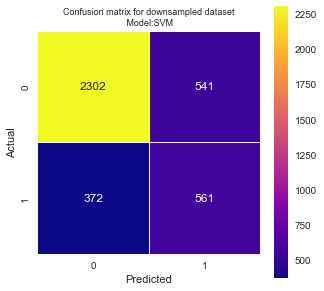

In [98]:
svc_model_downsampled = SVC()
svc_model_downsampled.fit(X_train_downsampled, y_train_downsampled)
y_pred_svc_downsampled = svc_model_downsampled.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_svc_downsampled))

# performance metrics
metrics_calc(y_test, y_pred_svc_downsampled, 'SVM', 'downsampled dataset')

# confusion matrix
cm(y_test, y_pred_svc_downsampled, 'downsampled dataset', 'SVM')

# SVM - SMOTE resampled data

SVC()

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2843
           1       0.51      0.60      0.55       933

    accuracy                           0.76      3776
   macro avg       0.68      0.70      0.69      3776
weighted avg       0.77      0.76      0.76      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,SVM - SMOTE dataset,0.756621,0.596999,0.506364,0.547959,0.703002


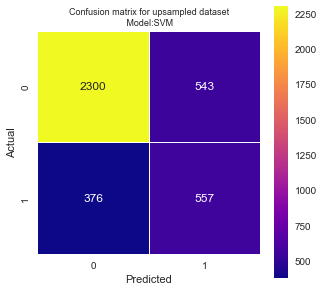

In [99]:
svc_model_SMOTE = SVC()
svc_model_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_svc_SMOTE = svc_model_SMOTE.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_svc_SMOTE))

# performance metrics
metrics_calc(y_test, y_pred_svc_SMOTE, 'SVM', 'SMOTE dataset')

# confusion matrix
cm(y_test, y_pred_svc_SMOTE, 'upsampled dataset', 'SVM')

# SVM - Hyperparameter Tuning: GridSearchCV

In [100]:
# https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 

svm_cv = GridSearchCV(estimator=svc_model_SMOTE, param_grid=param_grid, verbose=10, cv= 5)
svm_cv.fit(X_train_SMOTE,y_train_SMOTE)

print("Tuned Logistic Regression Parameters: {}".format(svm_cv.best_params_)) 
print("Best score is {}".format(svm_cv.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START C=0.1, gamma=1, kernel=rbf.................................
[CV 1/5; 1/25] END ..C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=  21.7s
[CV 2/5; 1/25] START C=0.1, gamma=1, kernel=rbf.................................
[CV 2/5; 1/25] END ..C=0.1, gamma=1, kernel=rbf;, score=0.705 total time=  25.2s
[CV 3/5; 1/25] START C=0.1, gamma=1, kernel=rbf.................................
[CV 3/5; 1/25] END ..C=0.1, gamma=1, kernel=rbf;, score=0.703 total time=  23.0s
[CV 4/5; 1/25] START C=0.1, gamma=1, kernel=rbf.................................
[CV 4/5; 1/25] END ..C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=  25.0s
[CV 5/5; 1/25] START C=0.1, gamma=1, kernel=rbf.................................
[CV 5/5; 1/25] END ..C=0.1, gamma=1, kernel=rbf;, score=0.692 total time=  26.2s
[CV 1/5; 2/25] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/5; 2/25] END C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=10)

Tuned Logistic Regression Parameters: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
Best score is 0.8111260245773266


# SVM - with Tuned parameters, SMOTE dataset

SVC(C=1000, gamma=1)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      2843
           1       0.39      0.47      0.43       933

    accuracy                           0.68      3776
   macro avg       0.60      0.61      0.60      3776
weighted avg       0.71      0.68      0.69      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,SVM - SMOTE dataset,0.684057,0.472669,0.386165,0.42506,0.613049


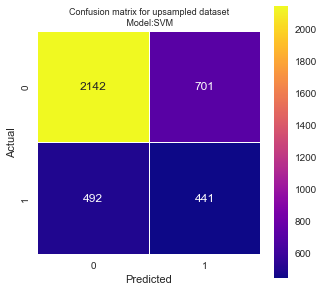

In [102]:
svc_model_SMOTE = SVC(C=1000, gamma=1, kernel='rbf')
svc_model_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_svc_SMOTE = svc_model_SMOTE.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_svc_SMOTE))

# performance metrics
metrics_calc(y_test, y_pred_svc_SMOTE, 'SVM', 'SMOTE dataset')

# confusion matrix
cm(y_test, y_pred_svc_SMOTE, 'upsampled dataset', 'SVM')

In [130]:
X_train_SMOTE = X_train_SMOTE.values
y_train_SMOTE = y_train_SMOTE.values
X_test_ = X_test.values
y_test_ = y_test.values
mse, bias, variance = bias_variance_decomp(svc_model_SMOTE, X_train_SMOTE, y_train_SMOTE, X_test_, y_test_, loss='mse', num_rounds=10, random_seed=33)
# summarize results
print('MSE:' , mse)
print('Bias:' , bias)
print('Variance:' , variance)

MSE: 0.33485169491525424
Bias: 0.24497351694915254
Variance: 0.0898781779661017


# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

# feature importance function
def importance_rfc(rfcmodel, datatype):
    importance_rfc = pd.Series(rfcmodel.feature_importances_, index=X_train.columns)
    title="Feature importances for Random Forest model - " + datatype + " data"
    importance_rfc.nlargest(18).plot.barh(title=title)

# Random Forest - original data

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2843
           1       0.67      0.40      0.50       933

    accuracy                           0.80      3776
   macro avg       0.75      0.67      0.69      3776
weighted avg       0.79      0.80      0.78      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Random Forest - untouched dataset,0.802701,0.403001,0.666667,0.502338,0.668437


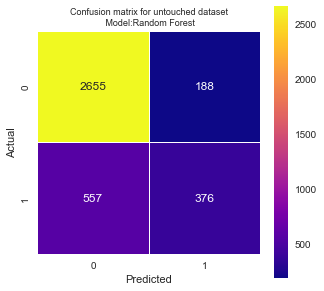

Accuracy using kFold cross-validation: mean =0.795, std =0.007
MSE for  fold no. 0 using the test set: -0.21178027796161483
MSE for  fold no. 1 using the test set: -0.21244209133024486
MSE for  fold no. 2 using the test set: -0.20397350993377483
MSE for  fold no. 3 using the test set: -0.2185430463576159
MSE for  fold no. 4 using the test set: -0.2139072847682119
MSE for  fold no. 5 using the test set: -0.2099337748344371
MSE for  fold no. 6 using the test set: -0.21059602649006623
MSE for  fold no. 7 using the test set: -0.19602649006622516
MSE for  fold no. 8 using the test set: -0.1986754966887417
MSE for  fold no. 9 using the test set: -0.1986754966887417


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


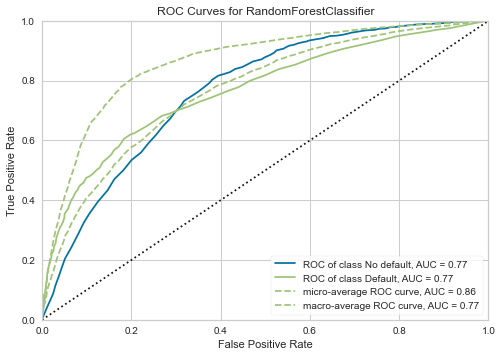

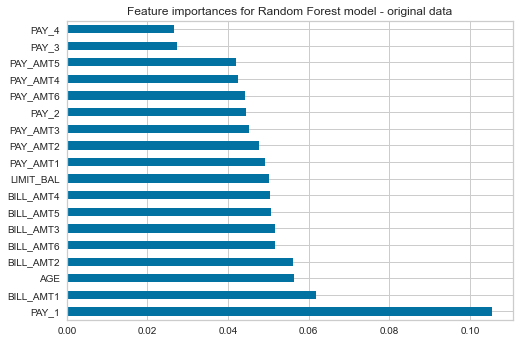

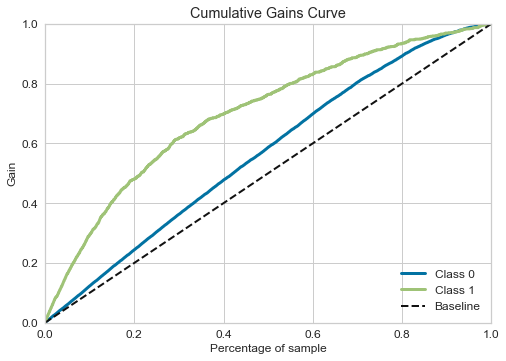

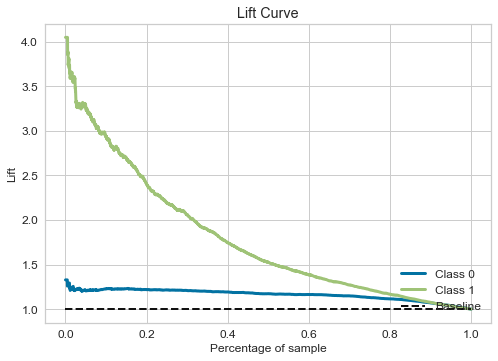

In [89]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_rfc))

# performance metrics
metrics_calc(y_test, y_pred_rfc, 'Random Forest', 'untouched dataset')

# confusion metric
cm(y_test, y_pred_rfc, 'untouched dataset', 'Random Forest')

# cross validation
cross_val(rfc_model, X_train, y_train)

# ROC curve
roc = roc_auc(rfc_model, X_train, y_train, X_test, y_test, classes=['No default', 'Default'])

# feature importance
importance_rfc(rfc_model, "original")

# gains, lift curve
gains_lift(rfc_model)

# Random Forest - upsampled data

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2843
           1       0.61      0.46      0.52       933

    accuracy                           0.79      3776
   macro avg       0.72      0.68      0.69      3776
weighted avg       0.78      0.79      0.78      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Random Forest - upsampled dataset,0.792373,0.457663,0.605674,0.521368,0.67994


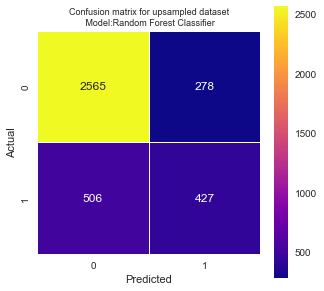

Accuracy using kFold cross-validation: mean =0.927, std =0.005
MSE for  fold no. 0 using the test set: -0.06971580817051509
MSE for  fold no. 1 using the test set: -0.07015985790408526
MSE for  fold no. 2 using the test set: -0.07196801421590404
MSE for  fold no. 3 using the test set: -0.07196801421590404
MSE for  fold no. 4 using the test set: -0.08396268325188805
MSE for  fold no. 5 using the test set: -0.0693025322079076
MSE for  fold no. 6 using the test set: -0.07285650821856952
MSE for  fold no. 7 using the test set: -0.07418924922256774
MSE for  fold no. 8 using the test set: -0.07330075521990227
MSE for  fold no. 9 using the test set: -0.073745002221235


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


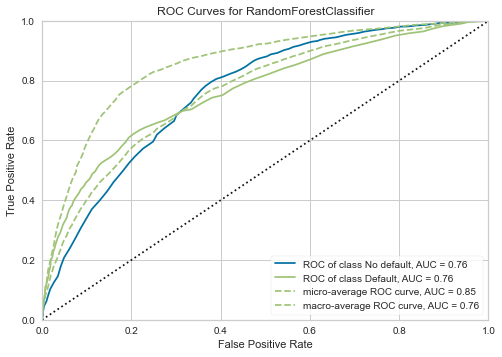

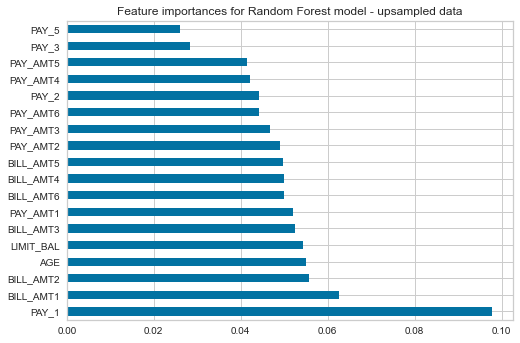

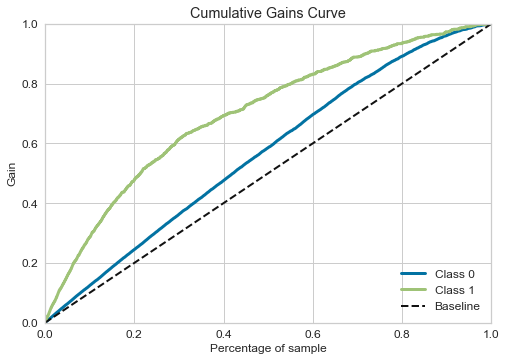

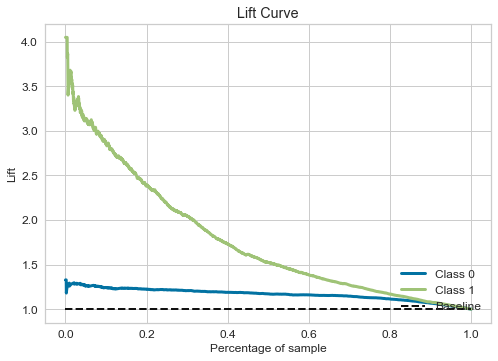

In [90]:
rfc_model_upsampled = RandomForestClassifier()
rfc_model_upsampled.fit(X_train_upsampled,y_train_upsampled)
y_pred_rfc_upsampled = rfc_model_upsampled.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_rfc_upsampled))

# performance metrics
metrics_calc(y_test, y_pred_rfc_upsampled, 'Random Forest', 'upsampled dataset')

# confusion matrix
cm(y_test, y_pred_rfc_upsampled, 'upsampled dataset', 'Random Forest Classifier')

# cross validation
cross_val(rfc_model_upsampled, X_train_upsampled,y_train_upsampled)

# ROC curve
roc = roc_auc(rfc_model_upsampled, X_train, y_train, X_test, y_test, classes=['No default', 'Default'])

# feature importance
importance_rfc(rfc_model_upsampled, "upsampled")

# gains, lift curve
gains_lift(rfc_model_upsampled)

# Random Forest - downsampled data

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      2843
           1       0.48      0.65      0.55       933

    accuracy                           0.74      3776
   macro avg       0.67      0.71      0.68      3776
weighted avg       0.77      0.74      0.75      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Random Forest - downsampled dataset,0.736758,0.652733,0.476153,0.550633,0.708533


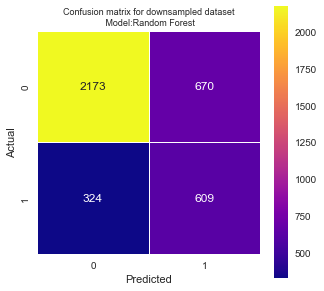

Accuracy using kFold cross-validation: mean =0.703, std =0.017
MSE for  fold no. 0 using the test set: -0.2974025974025974
MSE for  fold no. 1 using the test set: -0.2623376623376623
MSE for  fold no. 2 using the test set: -0.3198959687906372
MSE for  fold no. 3 using the test set: -0.31729518855656696
MSE for  fold no. 4 using the test set: -0.305591677503251
MSE for  fold no. 5 using the test set: -0.28608582574772434
MSE for  fold no. 6 using the test set: -0.28738621586475943
MSE for  fold no. 7 using the test set: -0.30429128738621586
MSE for  fold no. 8 using the test set: -0.28738621586475943
MSE for  fold no. 9 using the test set: -0.30299089726918077


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


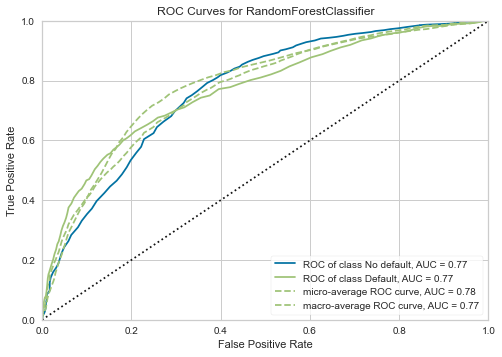

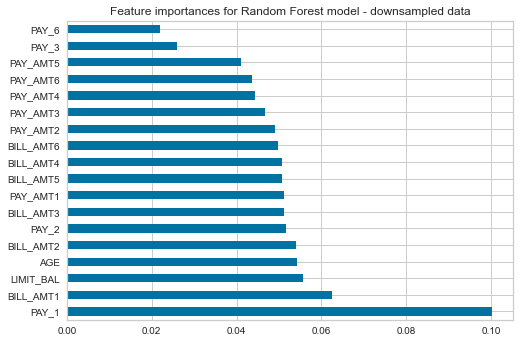

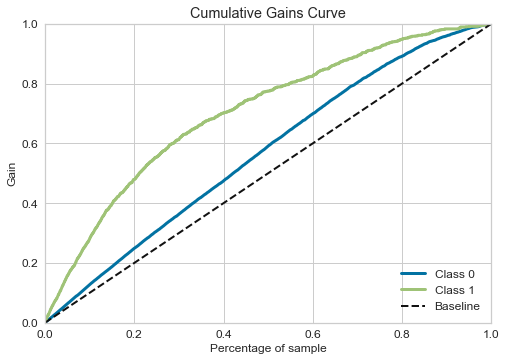

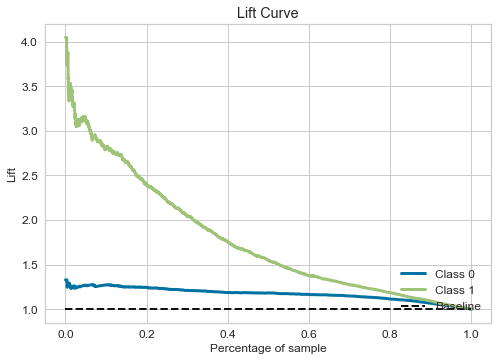

In [91]:
rfc_model_downsampled = RandomForestClassifier()
rfc_model_downsampled.fit(X_train_downsampled,y_train_downsampled)
y_pred_rfc_downsampled = rfc_model_downsampled.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_rfc_downsampled))

# performance metrics
metrics_calc(y_test, y_pred_rfc_downsampled, 'Random Forest', 'downsampled dataset')

# confusion matrix
cm(y_test, y_pred_rfc_downsampled, 'downsampled dataset', 'Random Forest')

# cross validation
cross_val(rfc_model_downsampled, X_train_downsampled, y_train_downsampled)

# ROC curve
roc = roc_auc(rfc_model_downsampled, X_train, y_train, X_test, y_test, classes=['No default', 'Default'])

# feature importance
importance_rfc(rfc_model_downsampled, "downsampled")

# gains, lift curve
gains_lift(rfc_model_downsampled)

# Random Forest - SMOTE resampled data

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2843
           1       0.58      0.47      0.52       933

    accuracy                           0.79      3776
   macro avg       0.71      0.68      0.69      3776
weighted avg       0.77      0.79      0.78      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Random Forest - SMOTE dataset,0.786017,0.468382,0.583445,0.51962,0.679319


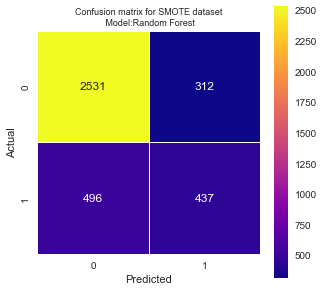

Accuracy using kFold cross-validation: mean =0.856, std =0.005
MSE for  fold no. 0 using the test set: -0.13987566607460036
MSE for  fold no. 1 using the test set: -0.15097690941385436
MSE for  fold no. 2 using the test set: -0.14349178143047533
MSE for  fold no. 3 using the test set: -0.1528209684584629
MSE for  fold no. 4 using the test set: -0.14837849844513548
MSE for  fold no. 5 using the test set: -0.1528209684584629
MSE for  fold no. 6 using the test set: -0.14171479342514437
MSE for  fold no. 7 using the test set: -0.14304753442914261
MSE for  fold no. 8 using the test set: -0.14349178143047533
MSE for  fold no. 9 using the test set: -0.13371834740115504


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


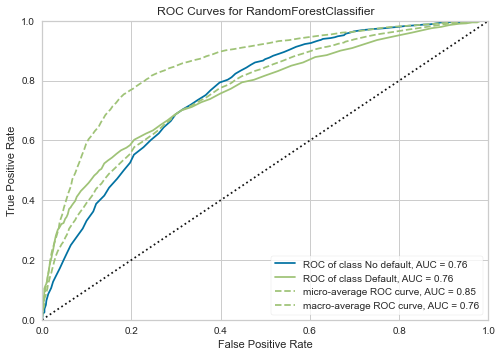

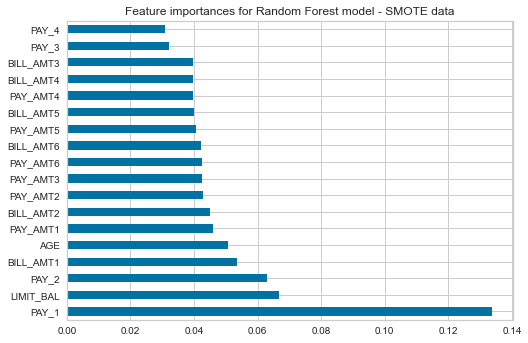

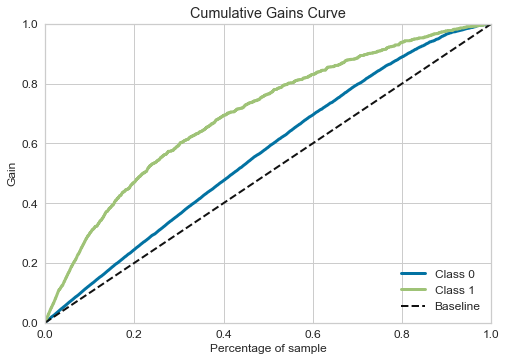

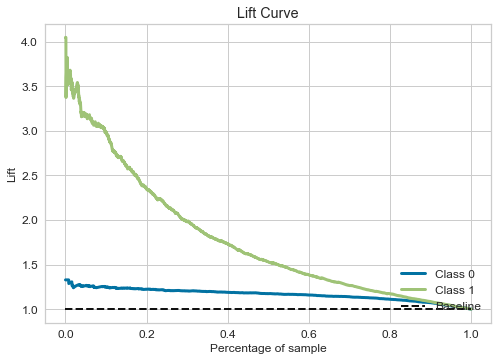

In [92]:
rfc_model_SMOTE = RandomForestClassifier()
rfc_model_SMOTE.fit(X_train_SMOTE,y_train_SMOTE)
y_pred_rfc_SMOTE = rfc_model_SMOTE.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_rfc_SMOTE))

# performance metrics
metrics_calc(y_test, y_pred_rfc_SMOTE, 'Random Forest', 'SMOTE dataset')

# confusion matrix
cm(y_test, y_pred_rfc_SMOTE, 'SMOTE dataset', 'Random Forest')

# cross validation
cross_val(rfc_model_SMOTE, X_train_SMOTE,y_train_SMOTE)

# ROC curve
roc = roc_auc(rfc_model_SMOTE, X_train, y_train, X_test, y_test, classes=['No default', 'Default'])

# feature importance
importance_rfc(rfc_model_SMOTE, "SMOTE")

# gains, lift curve
gains_lift(rfc_model_SMOTE)

# Random Forest - Hyperparameter Tuning: GridSearchCV

The best performing logistic regression model was the one that was trained on the SMOTE sampled dataset, therefore hyperparameter tuning shall be performed on this model with the use of GridSearchCV.

In [100]:
print('Parameters currently in use:\n')
print(rfc_model_SMOTE.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [332]:
# https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv
param_grid = { 
    'n_estimators': [10, 20],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [2,4],
    'max_leaf_nodes' : range(2,10,1),
    'criterion' :['gini', 'entropy']
}

randomforest_cv = GridSearchCV(estimator=rfc_model_SMOTE, param_grid=param_grid, verbose=10, cv= 5)
randomforest_cv.fit(X_train_SMOTE,y_train_SMOTE)

print("Tuned Logistic Regression Parameters: {}".format(randomforest_cv.best_params_)) 
print("Best score is {}".format(randomforest_cv.best_score_))

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5; 1/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 1/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.707 total time=   0.3s
[CV 2/5; 1/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 2/5; 1/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.705 total time=   0.2s
[CV 3/5; 1/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 1/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.704 total time=   0.2s
[CV 4/5; 1/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 4/5; 1/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.701 total time=   0.2s
[CV 5/5; 1/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 1/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.718 total time=   0.2s
[CV 1/5; 2/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20
[CV 1/5; 2/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.677 total time=   0.3s
[CV 2/5; 2/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 2/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.702 total time=   0.4s
[CV 3/5; 2/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 2/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.708 total time=   0.3s
[CV 4/5; 2/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 2/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.701 total time=   0.3s
[CV 5/5; 2/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 2/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.708 total time=   0.3s
[CV 1/5; 3/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 1/5; 3/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.698 total time=   0.2s
[CV 2/5; 3/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 3/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.712 total time=   0.2s
[CV 3/5; 3/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 3/5; 3/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.701 total time=   0.2s
[CV 4/5; 3/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 3/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.704 total time=   0.2s
[CV 5/5; 3/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 5/5; 3/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.701 total time=   0.1s
[CV 1/5; 4/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 4/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.711 total time=   0.3s
[CV 2/5; 4/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 4/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.711 total time=   0.3s
[CV 3/5; 4/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 4/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.708 total time=   0.3s
[CV 4/5; 4/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 4/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.704 total time=   0.3s
[CV 5/5; 4/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 4/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.716 total time=   0.4s
[CV 1/5; 5/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 1/5; 5/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.711 total time=   0.2s
[CV 2/5; 5/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 5/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.718 total time=   0.2s
[CV 3/5; 5/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 3/5; 5/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.708 total time=   0.2s
[CV 4/5; 5/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 5/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.710 total time=   0.2s
[CV 5/5; 5/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 5/5; 5/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.719 total time=   0.2s
[CV 1/5; 6/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 6/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.707 total time=   0.3s
[CV 2/5; 6/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 6/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.711 total time=   0.3s
[CV 3/5; 6/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 6/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.710 total time=   0.3s
[CV 4/5; 6/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 6/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.709 total time=   0.3s
[CV 5/5; 6/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 6/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.717 total time=   0.3s
[CV 1/5; 7/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 7/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.704 total time=   0.2s
[CV 2/5; 7/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10
[CV 2/5; 7/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.703 total time=   0.2s
[CV 3/5; 7/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 7/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.711 total time=   0.2s
[CV 4/5; 7/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10
[CV 4/5; 7/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.692 total time=   0.2s
[CV 5/5; 7/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 7/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.712 total time=   0.2s
[CV 1/5; 8/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 8/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.713 total time=   0.3s
[CV 2/5; 8/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 8/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.711 total time=   0.3s
[CV 3/5; 8/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 8/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.713 total time=   0.3s
[CV 4/5; 8/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 8/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.702 total time=   0.3s
[CV 5/5; 8/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 8/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.719 total time=   0.3s
[CV 1/5; 9/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10
[CV 1/5; 9/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.701 total time=   0.2s
[CV 2/5; 9/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 9/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.708 total time=   0.2s
[CV 3/5; 9/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10
[CV 3/5; 9/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.708 total time=   0.2s
[CV 4/5; 9/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 9/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.685 total time=   0.2s
[CV 5/5; 9/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 9/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.703 total time=   0.5s
[CV 1/5; 10/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 10/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.709 total time=   0.4s
[CV 2/5; 10/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 10/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.712 total time=   0.3s
[CV 3/5; 10/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 10/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.714 total time=   0.3s
[CV 4/5; 10/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 10/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.707 total time=   0.3s
[CV 5/5; 10/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 10/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.723 total time=   0.3s
[CV 1/5; 11/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10
[CV 1/5; 11/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.706 total time=   0.2s
[CV 2/5; 11/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 11/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.706 total time=   0.2s
[CV 3/5; 11/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10
[CV 3/5; 11/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.713 total time=   0.1s
[CV 4/5; 11/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 11/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.701 total time=   0.2s
[CV 5/5; 11/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10
[CV 5/5; 11/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.712 total time=   0.1s
[CV 1/5; 12/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 12/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.709 total time=   0.3s
[CV 2/5; 12/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 12/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.711 total time=   0.3s
[CV 3/5; 12/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 12/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.711 total time=   0.3s
[CV 4/5; 12/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 12/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.706 total time=   0.3s
[CV 5/5; 12/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 12/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.721 total time=   0.3s
[CV 1/5; 13/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10
[CV 1/5; 13/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.705 total time=   0.2s
[CV 2/5; 13/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 13/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.714 total time=   0.2s
[CV 3/5; 13/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10
[CV 3/5; 13/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.704 total time=   0.2s
[CV 4/5; 13/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 13/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.707 total time=   0.2s
[CV 5/5; 13/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10
[CV 5/5; 13/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.717 total time=   0.2s
[CV 1/5; 14/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 14/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.706 total time=   0.3s
[CV 2/5; 14/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 14/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.716 total time=   0.3s
[CV 3/5; 14/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 14/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.710 total time=   0.3s
[CV 4/5; 14/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 14/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.710 total time=   0.3s
[CV 5/5; 14/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 14/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.718 total time=   0.3s
[CV 1/5; 15/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10
[CV 1/5; 15/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.709 total time=   0.2s
[CV 2/5; 15/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 15/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.710 total time=   0.2s
[CV 3/5; 15/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10
[CV 3/5; 15/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.712 total time=   0.2s
[CV 4/5; 15/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 15/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.706 total time=   0.2s
[CV 5/5; 15/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10
[CV 5/5; 15/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.717 total time=   0.2s
[CV 1/5; 16/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 16/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.715 total time=   0.3s
[CV 2/5; 16/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 16/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.713 total time=   0.3s
[CV 3/5; 16/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 16/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.704 total time=   0.3s
[CV 4/5; 16/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 16/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.703 total time=   0.3s
[CV 5/5; 16/128] START criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 16/128] END criterion=gini, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.714 total time=   0.3s
[CV 1/5; 17/128] START criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 1/5; 17/128] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.678 total time=   0.1s
[CV 2/5; 17/128] START criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 2/5; 17/128] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.676 total time=   0.2s
[CV 3/5; 17/128] START criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 3/5; 17/128] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.708 total time=   0.1s
[CV 4/5; 17/128] START criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 4/5; 17/128] END criterion=gini,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 33/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.690 total time=   0.2s
[CV 3/5; 33/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 3/5; 33/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.679 total time=   0.2s
[CV 4/5; 33/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 33/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.672 total time=   0.2s
[CV 5/5; 33/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 5/5; 33/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.712 total time=   0.1s
[CV 1/5; 34/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 34/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.701 total time=   0.3s
[CV 2/5; 34/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 34/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.696 total time=   0.3s
[CV 3/5; 34/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 34/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.684 total time=   0.3s
[CV 4/5; 34/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 34/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.701 total time=   0.3s
[CV 5/5; 34/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 34/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.716 total time=   0.3s
[CV 1/5; 35/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 35/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.700 total time=   0.2s
[CV 2/5; 35/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 2/5; 35/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.709 total time=   0.2s
[CV 3/5; 35/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 35/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.714 total time=   0.2s
[CV 4/5; 35/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 4/5; 35/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.708 total time=   0.2s
[CV 5/5; 35/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 35/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.719 total time=   0.2s
[CV 1/5; 36/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 36/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.710 total time=   0.5s
[CV 2/5; 36/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 36/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.708 total time=   0.4s
[CV 3/5; 36/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 36/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.708 total time=   0.5s
[CV 4/5; 36/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 36/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.712 total time=   0.4s
[CV 5/5; 36/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 36/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.696 total time=   0.4s
[CV 1/5; 37/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 37/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.714 total time=   0.2s
[CV 2/5; 37/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 37/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.714 total time=   0.2s
[CV 3/5; 37/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 37/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.713 total time=   0.2s
[CV 4/5; 37/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 37/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.701 total time=   0.2s
[CV 5/5; 37/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 37/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.713 total time=   0.2s
[CV 1/5; 38/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 38/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.708 total time=   0.5s
[CV 2/5; 38/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 38/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.715 total time=   0.4s
[CV 3/5; 38/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 38/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.715 total time=   0.5s
[CV 4/5; 38/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 38/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.711 total time=   0.5s
[CV 5/5; 38/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 38/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.720 total time=   0.4s
[CV 1/5; 39/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 39/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.712 total time=   0.2s
[CV 2/5; 39/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 39/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.715 total time=   0.2s
[CV 3/5; 39/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 39/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.712 total time=   0.2s
[CV 4/5; 39/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 39/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.711 total time=   0.3s
[CV 5/5; 39/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 39/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.718 total time=   0.2s
[CV 1/5; 40/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 40/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.713 total time=   0.5s
[CV 2/5; 40/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 40/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.708 total time=   0.5s
[CV 3/5; 40/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 40/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.716 total time=   0.5s
[CV 4/5; 40/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 40/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.710 total time=   0.7s
[CV 5/5; 40/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 40/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.722 total time=   0.5s
[CV 1/5; 41/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 41/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.714 total time=   0.2s
[CV 2/5; 41/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 41/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.712 total time=   0.2s
[CV 3/5; 41/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 41/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.712 total time=   0.2s
[CV 4/5; 41/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 41/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.707 total time=   0.2s
[CV 5/5; 41/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 41/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.726 total time=   0.2s
[CV 1/5; 42/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 42/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.713 total time=   0.5s
[CV 2/5; 42/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 42/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.715 total time=   0.5s
[CV 3/5; 42/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 42/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.716 total time=   0.5s
[CV 4/5; 42/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 42/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.709 total time=   0.5s
[CV 5/5; 42/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 42/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.723 total time=   0.5s
[CV 1/5; 43/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 43/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.704 total time=   0.2s
[CV 2/5; 43/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 43/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.713 total time=   0.3s
[CV 3/5; 43/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 43/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.717 total time=   0.3s
[CV 4/5; 43/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 43/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.713 total time=   0.2s
[CV 5/5; 43/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 43/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.719 total time=   0.3s
[CV 1/5; 44/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 44/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.711 total time=   0.5s
[CV 2/5; 44/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 44/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.716 total time=   0.5s
[CV 3/5; 44/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 44/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.715 total time=   0.5s
[CV 4/5; 44/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 44/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.715 total time=   0.5s
[CV 5/5; 44/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 44/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.724 total time=   0.5s
[CV 1/5; 45/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 45/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.712 total time=   0.3s
[CV 2/5; 45/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 45/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.715 total time=   0.3s
[CV 3/5; 45/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 45/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.714 total time=   0.2s
[CV 4/5; 45/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 45/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.722 total time=   0.2s
[CV 5/5; 45/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 45/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.724 total time=   0.2s
[CV 1/5; 46/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 46/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.714 total time=   0.5s
[CV 2/5; 46/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 46/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.717 total time=   0.5s
[CV 3/5; 46/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 46/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.716 total time=   0.5s
[CV 4/5; 46/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 46/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.715 total time=   0.5s
[CV 5/5; 46/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 46/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.723 total time=   0.5s
[CV 1/5; 47/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 47/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.716 total time=   0.3s
[CV 2/5; 47/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 47/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.718 total time=   0.3s
[CV 3/5; 47/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 47/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.714 total time=   0.3s
[CV 4/5; 47/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 47/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.716 total time=   0.3s
[CV 5/5; 47/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 47/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.723 total time=   0.3s
[CV 1/5; 48/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 48/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.706 total time=   0.5s
[CV 2/5; 48/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 48/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.717 total time=   0.5s
[CV 3/5; 48/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 48/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.715 total time=   0.5s
[CV 4/5; 48/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 48/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.717 total time=   0.5s
[CV 5/5; 48/128] START criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 48/128] END criterion=gini, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.725 total time=   0.5s
[CV 1/5; 49/128] START criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 1/5; 49/128] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.693 total time=   0.2s
[CV 2/5; 49/128] START criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 2/5; 49/128] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.678 total time=   0.2s
[CV 3/5; 49/128] START criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 3/5; 49/128] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.696 total time=   0.2s
[CV 4/5; 49/128] START criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 4/5; 49/128] END criterion=gini,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 65/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.699 total time=   0.2s
[CV 3/5; 65/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 3/5; 65/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.703 total time=   0.2s
[CV 4/5; 65/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 65/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.699 total time=   0.2s
[CV 5/5; 65/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 5/5; 65/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.669 total time=   0.2s
[CV 1/5; 66/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 66/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.710 total time=   0.4s
[CV 2/5; 66/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 66/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.708 total time=   0.3s
[CV 3/5; 66/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 66/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.713 total time=   0.3s
[CV 4/5; 66/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 66/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.701 total time=   0.4s
[CV 5/5; 66/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 66/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.705 total time=   0.3s
[CV 1/5; 67/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 1/5; 67/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.703 total time=   0.2s
[CV 2/5; 67/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 67/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.703 total time=   0.2s
[CV 3/5; 67/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 3/5; 67/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.713 total time=   0.2s
[CV 4/5; 67/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 67/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.700 total time=   0.2s
[CV 5/5; 67/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 5/5; 67/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.718 total time=   0.2s
[CV 1/5; 68/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 68/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.708 total time=   0.4s
[CV 2/5; 68/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 68/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.706 total time=   0.3s
[CV 3/5; 68/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 68/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.712 total time=   0.4s
[CV 4/5; 68/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 68/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.710 total time=   0.4s
[CV 5/5; 68/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 68/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.722 total time=   0.3s
[CV 1/5; 69/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 1/5; 69/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.713 total time=   0.2s
[CV 2/5; 69/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 69/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.711 total time=   0.2s
[CV 3/5; 69/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 3/5; 69/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.703 total time=   0.2s
[CV 4/5; 69/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 69/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.699 total time=   0.2s
[CV 5/5; 69/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 5/5; 69/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.722 total time=   0.2s
[CV 1/5; 70/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 70/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.710 total time=   0.3s
[CV 2/5; 70/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 70/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.711 total time=   0.3s
[CV 3/5; 70/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 70/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.718 total time=   0.4s
[CV 4/5; 70/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 70/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.710 total time=   0.3s
[CV 5/5; 70/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 70/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.718 total time=   0.3s
[CV 1/5; 71/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10
[CV 1/5; 71/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.697 total time=   0.2s
[CV 2/5; 71/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 71/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.710 total time=   0.2s
[CV 3/5; 71/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10
[CV 3/5; 71/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.712 total time=   0.2s
[CV 4/5; 71/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 71/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.712 total time=   0.2s
[CV 5/5; 71/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10
[CV 5/5; 71/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.715 total time=   0.2s
[CV 1/5; 72/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 72/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.709 total time=   0.4s
[CV 2/5; 72/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 72/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.699 total time=   0.3s
[CV 3/5; 72/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 72/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.702 total time=   0.3s
[CV 4/5; 72/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 72/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.707 total time=   0.3s
[CV 5/5; 72/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 72/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.721 total time=   0.3s
[CV 1/5; 73/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10
[CV 1/5; 73/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.703 total time=   0.2s
[CV 2/5; 73/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 73/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.715 total time=   0.2s
[CV 3/5; 73/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10
[CV 3/5; 73/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.701 total time=   0.2s
[CV 4/5; 73/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 73/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.706 total time=   0.2s
[CV 5/5; 73/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10
[CV 5/5; 73/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.709 total time=   0.2s
[CV 1/5; 74/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 74/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.708 total time=   0.3s
[CV 2/5; 74/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 74/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.714 total time=   0.3s
[CV 3/5; 74/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 74/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.709 total time=   0.3s
[CV 4/5; 74/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 74/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.709 total time=   0.3s
[CV 5/5; 74/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 74/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.721 total time=   0.3s
[CV 1/5; 75/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10
[CV 1/5; 75/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.711 total time=   0.2s
[CV 2/5; 75/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 75/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.696 total time=   0.2s
[CV 3/5; 75/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10
[CV 3/5; 75/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.711 total time=   0.2s
[CV 4/5; 75/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 75/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.708 total time=   0.2s
[CV 5/5; 75/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10
[CV 5/5; 75/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.713 total time=   0.2s
[CV 1/5; 76/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 76/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.708 total time=   0.4s
[CV 2/5; 76/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 76/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.712 total time=   0.3s
[CV 3/5; 76/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 76/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.713 total time=   0.4s
[CV 4/5; 76/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 76/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.713 total time=   0.4s
[CV 5/5; 76/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 76/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.718 total time=   0.3s
[CV 1/5; 77/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10
[CV 1/5; 77/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.708 total time=   0.2s
[CV 2/5; 77/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 77/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.707 total time=   0.2s
[CV 3/5; 77/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10
[CV 3/5; 77/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.714 total time=   0.2s
[CV 4/5; 77/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 77/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.699 total time=   0.2s
[CV 5/5; 77/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10
[CV 5/5; 77/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.711 total time=   0.2s
[CV 1/5; 78/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 78/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.701 total time=   0.4s
[CV 2/5; 78/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 78/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.712 total time=   0.3s
[CV 3/5; 78/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 78/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.710 total time=   0.3s
[CV 4/5; 78/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 78/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.709 total time=   0.3s
[CV 5/5; 78/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 78/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.716 total time=   0.4s
[CV 1/5; 79/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10
[CV 1/5; 79/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.711 total time=   0.2s
[CV 2/5; 79/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 79/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.710 total time=   0.2s
[CV 3/5; 79/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10
[CV 3/5; 79/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.711 total time=   0.2s
[CV 4/5; 79/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 79/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.711 total time=   0.2s
[CV 5/5; 79/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10
[CV 5/5; 79/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.717 total time=   0.2s
[CV 1/5; 80/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 80/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.709 total time=   0.4s
[CV 2/5; 80/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 80/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.702 total time=   0.3s
[CV 3/5; 80/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 80/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.710 total time=   0.3s
[CV 4/5; 80/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 80/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.705 total time=   0.3s
[CV 5/5; 80/128] START criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 80/128] END criterion=entropy, max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.722 total time=   0.3s
[CV 1/5; 81/128] START criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 1/5; 81/128] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.702 total time=   0.2s
[CV 2/5; 81/128] START criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 2/5; 81/128] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.680 total time=   0.2s
[CV 3/5; 81/128] START criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 3/5; 81/128] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.706 total time=   0.2s
[CV 4/5; 81/128] START criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 4/5; 81/

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 97/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.697 total time=   0.2s
[CV 3/5; 97/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 3/5; 97/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.656 total time=   0.2s
[CV 4/5; 97/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 97/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.702 total time=   0.2s
[CV 5/5; 97/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 5/5; 97/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.673 total time=   0.2s
[CV 1/5; 98/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 98/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.706 total time=   0.4s
[CV 2/5; 98/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 98/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.695 total time=   0.3s
[CV 3/5; 98/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 98/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.702 total time=   0.3s
[CV 4/5; 98/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 98/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.699 total time=   0.3s
[CV 5/5; 98/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 98/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.709 total time=   0.4s
[CV 1/5; 99/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 99/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.711 total time=   0.2s
[CV 2/5; 99/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 99/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.712 total time=   0.2s
[CV 3/5; 99/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 99/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.704 total time=   0.2s
[CV 4/5; 99/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 99/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.701 total time=   0.2s
[CV 5/5; 99/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 99/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.712 total time=   0.2s
[CV 1/5; 100/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 100/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.710 total time=   0.4s
[CV 2/5; 100/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 100/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.706 total time=   0.5s
[CV 3/5; 100/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 100/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.707 total time=   0.4s
[CV 4/5; 100/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 100/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.711 total time=   0.4s
[CV 5/5; 100/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 100/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.716 total time=   0.4s
[CV 1/5; 101/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 101/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.705 total time=   0.3s
[CV 2/5; 101/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 101/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.714 total time=   0.3s
[CV 3/5; 101/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 101/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.703 total time=   0.3s
[CV 4/5; 101/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 101/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.702 total time=   0.2s
[CV 5/5; 101/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 101/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.716 total time=   0.3s
[CV 1/5; 102/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 102/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.709 total time=   0.7s
[CV 2/5; 102/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 102/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.711 total time=   0.5s
[CV 3/5; 102/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 102/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.711 total time=   0.5s
[CV 4/5; 102/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 102/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.711 total time=   0.5s
[CV 5/5; 102/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 102/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.717 total time=   0.5s
[CV 1/5; 103/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 103/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.706 total time=   0.3s
[CV 2/5; 103/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 103/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.705 total time=   0.3s
[CV 3/5; 103/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 103/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.713 total time=   0.3s
[CV 4/5; 103/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 103/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.710 total time=   0.3s
[CV 5/5; 103/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 103/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.716 total time=   0.3s
[CV 1/5; 104/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 104/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.712 total time=   0.5s
[CV 2/5; 104/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 104/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.711 total time=   0.5s
[CV 3/5; 104/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 104/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.712 total time=   0.5s
[CV 4/5; 104/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 104/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.705 total time=   0.5s
[CV 5/5; 104/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 104/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.720 total time=   0.5s
[CV 1/5; 105/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 105/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.710 total time=   0.3s
[CV 2/5; 105/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 105/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.711 total time=   0.3s
[CV 3/5; 105/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 105/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.714 total time=   0.3s
[CV 4/5; 105/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 105/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.708 total time=   0.3s
[CV 5/5; 105/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 105/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.723 total time=   0.3s
[CV 1/5; 106/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 106/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.711 total time=   0.6s
[CV 2/5; 106/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 106/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.717 total time=   0.6s
[CV 3/5; 106/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 106/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.717 total time=   0.6s
[CV 4/5; 106/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 106/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.709 total time=   0.6s
[CV 5/5; 106/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 106/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.718 total time=   0.5s
[CV 1/5; 107/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 107/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.715 total time=   0.3s
[CV 2/5; 107/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 107/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.712 total time=   0.3s
[CV 3/5; 107/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 107/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.716 total time=   0.3s
[CV 4/5; 107/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 107/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.714 total time=   0.3s
[CV 5/5; 107/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 107/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.720 total time=   0.3s
[CV 1/5; 108/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 108/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.716 total time=   0.6s
[CV 2/5; 108/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 108/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.716 total time=   0.6s
[CV 3/5; 108/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 108/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.716 total time=   0.5s
[CV 4/5; 108/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 108/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.710 total time=   0.5s
[CV 5/5; 108/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 108/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.720 total time=   0.6s
[CV 1/5; 109/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 109/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.712 total time=   0.3s
[CV 2/5; 109/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 109/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.712 total time=   0.4s
[CV 3/5; 109/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 109/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.714 total time=   0.3s
[CV 4/5; 109/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 109/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.713 total time=   0.3s
[CV 5/5; 109/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 109/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.723 total time=   0.3s
[CV 1/5; 110/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 110/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.714 total time=   0.6s
[CV 2/5; 110/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 110/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.718 total time=   0.5s
[CV 3/5; 110/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 110/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.716 total time=   0.5s
[CV 4/5; 110/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 110/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.716 total time=   0.5s
[CV 5/5; 110/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 110/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.724 total time=   0.5s
[CV 1/5; 111/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 111/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.711 total time=   0.3s
[CV 2/5; 111/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 111/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.716 total time=   0.3s
[CV 3/5; 111/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 111/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.714 total time=   0.3s
[CV 4/5; 111/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 111/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.713 total time=   0.3s
[CV 5/5; 111/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 111/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.724 total time=   0.3s
[CV 1/5; 112/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 112/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.713 total time=   0.6s
[CV 2/5; 112/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 112/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.716 total time=   0.6s
[CV 3/5; 112/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 112/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.719 total time=   0.6s
[CV 4/5; 112/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 112/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.712 total time=   0.6s
[CV 5/5; 112/128] START criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 112/128] END criterion=entropy, max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.723 total time=   0.5s
[CV 1/5; 113/128] START criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 1/5; 113/128] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.711 total time=   0.2s
[CV 2/5; 113/128] START criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 2/5; 113/128] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.692 total time=   0.2s
[CV 3/5; 113/128] START criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 3/5; 113/128] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.678 total time=   0.2s
[CV 4/5; 113/128] START criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': range(2, 10),
                         'n_estimators': [10, 20]},
             verbose=10)

Tuned Logistic Regression Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': 8, 'n_estimators': 20}
Best score is 0.7176687833858251


# Random Forest - with Tuned parameters, SMOTE dataset

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=8, n_estimators=20)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2843
           1       0.56      0.59      0.57       933

    accuracy                           0.78      3776
   macro avg       0.71      0.72      0.71      3776
weighted avg       0.79      0.78      0.78      3776



,Model,Accuracy,Recall,Precision,F1 Score,ROC
0,Random Forest - SMOTE dataset - TUNED,0.782309,0.585209,0.556575,0.570533,0.716101


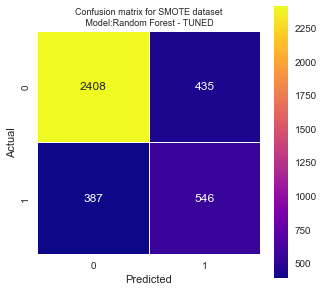

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

Accuracy using kFold cross-validation: mean =0.735, std =0.008


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

MSE for  fold no. 0 using the test set: -0.2682060390763766
MSE for  fold no. 1 using the test set: -0.2766429840142096
MSE for  fold no. 2 using the test set: -0.2705464238116393
MSE for  fold no. 3 using the test set: -0.2763216348289649
MSE for  fold no. 4 using the test set: -0.25366503776099514
MSE for  fold no. 5 using the test set: -0.26521545979564637
MSE for  fold no. 6 using the test set: -0.25366503776099514
MSE for  fold no. 7 using the test set: -0.2687694358063083
MSE for  fold no. 8 using the test set: -0.24877832074633496
MSE for  fold no. 9 using the test set: -0.26077298978231894


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


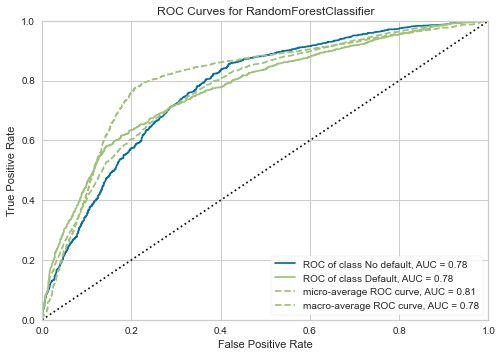

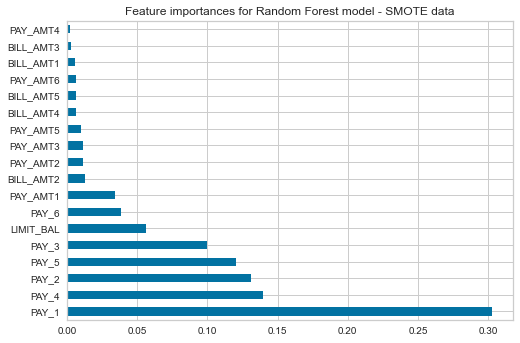

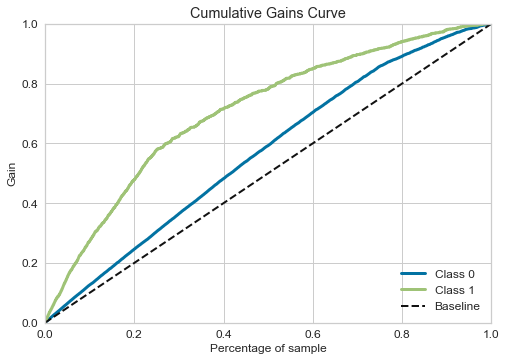

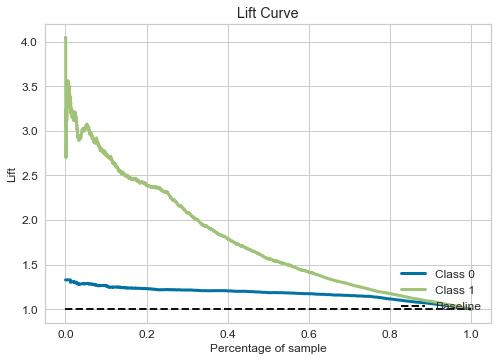

In [96]:
rfc_model_SMOTE = RandomForestClassifier(criterion='entropy', max_depth=4, max_features='auto', max_leaf_nodes=8, n_estimators=20)
rfc_model_SMOTE.fit(X_train_SMOTE,y_train_SMOTE)
y_pred_rfc_SMOTE = rfc_model_SMOTE.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_rfc_SMOTE))

# performance metrics
metrics_calc(y_test, y_pred_rfc_SMOTE, 'Random Forest', 'SMOTE dataset - TUNED')

# confusion matrix
cm(y_test, y_pred_rfc_SMOTE, 'SMOTE dataset', 'Random Forest - TUNED')

# cross validation
cross_val(rfc_model_SMOTE, X_train_SMOTE,y_train_SMOTE)

# ROC curve
roc = roc_auc(rfc_model_SMOTE, X_train, y_train, X_test, y_test, classes=['No default', 'Default'])

# feature importance
importance_rfc(rfc_model_SMOTE, "SMOTE")

# gains, lift curve
gains_lift(rfc_model_SMOTE)

In [128]:
X_train_SMOTE = X_train_SMOTE.values
y_train_SMOTE = y_train_SMOTE.values
X_test_ = X_test.values
y_test_ = y_test.values
mse, bias, variance = bias_variance_decomp(rfc_model_SMOTE, X_train_SMOTE, y_train_SMOTE, X_test_, y_test_, loss='mse', num_rounds=10, random_seed=33)
# summarize results
print('MSE:' , mse)
print('Bias:' , bias)
print('Variance:' , variance)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

MSE: 0.2148834745762712
Bias: 0.2029978813559322
Variance: 0.011885593220338985


# References

Hernandez, W. (2022) COMP0198 Machine Learning with Applications in Finance Week 2 Workshop, UCL Moodle. Available at: https://moodle.ucl.ac.uk/course/view.php?id=1416§ion=5#tabs-tree-start (Accessed: November 23, 2022).    

Hernandez, W. (2022) COMP0198 Machine Learning with Applications in Finance Week 3 Workshop, UCL Moodle. Available at: https://moodle.ucl.ac.uk/course/view.php?id=1416§ion=6#tabs-tree-start (Accessed: November 23, 2022).  

Hernandez, W. (2022) COMP0198 Machine Learning with Applications in Finance Week 4 Workshop, UCL Moodle. Available at: https://moodle.ucl.ac.uk/course/view.php?id=1416§ion=7#tabs-tree-start (Accessed: November 23, 2022).  

Hernandez, W. (2022) COMP0198 Machine Learning with Applications in Finance Week 5 Workshop, UCL Moodle. Available at: https://moodle.ucl.ac.uk/course/view.php?id=1416§ion=8#tabs-tree-start (Accessed: November 23, 2022).  

Hernandez, W. (2022) COMP0198 Machine Learning with Applications in Finance Week 6 Workshop, UCL Moodle. Available at: https://moodle.ucl.ac.uk/course/view.php?id=1416§ion=9#tabs-tree-start (Accessed: November 23, 2022).  
 
Hernandez, W. (2022) COMP0198 Machine Learning with Applications in Finance Week 7 Workshop, UCL Moodle. Available at: https://moodle.ucl.ac.uk/course/view.php?id=1416§ion=10#tabs-tree-start (Accessed: November 23, 2022).  

Keenoglanville (2022) A fool's complete guide to logistic regression, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/keenoglanville/a-fool-s-complete-guide-to-logistic-regression (Accessed: December 12, 2022).   

Lucabasa (2018) Credit card default: A very pedagogical notebook, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/lucabasa/credit-card-default-a-very-pedagogical-notebook#Algorithm-Selection (Accessed: December 12, 2022).   
